In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import operator 
import itertools
import collections
import numpy as np
import pprint
from collections import defaultdict
!pip install pattern
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [3]:
train_df = pd.read_csv("data-train.csv", sep="|")
train_df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,"Saga, Vol. 6",Brian K. Vaughan,"After a dramatic time jump, the three-time Eis...",Paperback,Trade,152.0,NaN,NaN,NaN,NaN,...,0.192117,0.153279,0.108678,0.046675,0.041950,0.030195,0.020284,0.017172,0.012331,NaN
1,Apocalypse Never: Why Environmental Alarmism H...,Michael Shellenberger,Michael Shellenberger has been fighting for a ...,ebook,NaN,272.0,NaN,NaN,NaN,NaN,...,0.264484,0.143577,0.103275,0.052897,0.047859,0.032746,0.030227,0.030227,0.020151,NaN
2,Paris in Love,Eloisa James,"In 2009, New York Times bestselling author Elo...",Hardcover,NaN,272.0,"April 3, 2012",Random House,NaN,NaN,...,0.245133,0.193805,0.110619,0.065487,0.033628,0.023894,0.018584,0.017699,0.017699,328586.12
3,"Hawkeye, Volume 1: My Life as a Weapon",Matt Fraction,The breakout star of this summer's blockbuster...,Paperback,NaN,136.0,"March 19, 2013",Marvel,13 years and up,NaN,...,0.265924,0.080679,0.049009,0.048478,0.042286,0.039809,0.009554,0.008846,0.007254,218431.81
4,26 Absurdities of Tragic Proportions: Unusual ...,Matthew C. Woodruff,Awarded Finalist Prize in the 2019 American Fi...,Kindle Edition,NaN,131.0,"June 17, 2018",Matthew C. Woodruff,NaN,NaN,...,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63


In [4]:
train_df.shape

(4050, 40)

In [5]:
test_df = pd.read_csv("data-test.csv", sep="|")
test_df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,The Invention of Wings,Sue Monk Kidd,Writing at the height of her narrative and ima...,Hardcover,NaN,384.0,"January 7, 2014",Viking,NaN,920L,...,0.275600,0.067606,0.041180,0.031271,0.029399,0.027087,0.014975,0.014314,0.013103,237199.91
1,A Season of Sinister Dreams,Tracy Banghart,Furyborn meets A Curse So Dark and Lonely in ...,Hardcover,NaN,320.0,"June 22, 2021","Little, Brown Books for Young Readers",14 years and up,NaN,...,0.288462,0.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245284.63
2,The Enchantress Returns,Chris Colfer,"After decades of hiding, the evil Enchantress ...",Hardcover,NaN,517.0,"August 6, 2013","Little, Brown Books for Young Readers",8 - 12 years,760L,...,0.152362,0.064500,0.064500,0.063992,0.061960,0.052311,0.040122,0.034535,0.025901,225939.05
3,The Council of Mirrors,Michael Buckley,The thrilling conclusion to the beloved New Yo...,Hardcover,NaN,352.0,"April 19, 2012",Harry N. Abrams,8 - 12 years,730L,...,0.106748,0.098160,0.073620,0.069939,0.067485,0.061350,0.055215,0.040491,0.028221,345766.15
4,Connect: Building Exceptional Relationships wi...,David Bradford,A transformative guide to building more fulfil...,Hardcover,NaN,320.0,"February 9, 2021",Currency,NaN,NaN,...,0.147059,0.117647,0.117647,0.088235,0.058824,0.058824,0.058824,0.058824,NaN,293792.95


In [6]:
test_df.shape

(500, 40)

In [7]:
df = pd.read_csv("data-total.csv", sep="|")
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,Divergent,Veronica Roth,"In Beatrice Prior's dystopian Chicago, society...",Hardcover,1st edition,487.0,"May 2, 2011",Katherine Tegen Books,14 years and up,HL700L,...,0.222024,0.113507,0.106666,0.093449,0.064917,0.023852,0.019872,0.013714,0.013574,173244.00
1,Shadowfever,Karen Marie Moning,"“Evil is a completely different creature, Mac....",Hardcover,First Edition,608.0,"January 18, 2011",Delacorte Press,NaN,NaN,...,0.208148,0.162019,0.122214,0.083031,0.078781,0.048202,0.031720,0.030787,0.023116,533880.26
2,A Dance with Dragons,George R.R. Martin,Alternate cover edition of ASIN B004XISI4AIn t...,Kindle Edition,NaN,1125.0,NaN,NaN,NaN,NaN,...,0.144885,0.031548,0.023312,0.021093,0.017476,0.016534,0.016473,0.013829,0.012248,NaN
3,City of Fallen Angels,Cassandra Clare,"The Mortal War is over, and sixteen-year-old C...",Hardcover,First Edition,425.0,"April 5, 2011",Margaret K. McElderry Books,14 years and up,HL750L,...,0.243346,0.086831,0.083956,0.061511,0.049763,0.042539,0.038681,0.030545,0.025530,114629.78
4,Bossypants,Tina Fey,"Before Liz Lemon, before ""Weekend Update,"" bef...",Kindle Edition,NaN,283.0,NaN,NaN,NaN,NaN,...,0.179684,0.163715,0.109603,0.076105,0.057850,0.039813,0.028780,0.021013,0.018908,NaN


In [8]:
df.shape

(4550, 40)

In [9]:
df.describe()

,pages,weight,rating_value0,rating_value1,rating_count1,dimension_0,dimension_1,dimension_2,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
count,4405.000000,1381.000000,4540.000000,1434.000000,1434.000000,1373.000000,1373.000000,1324.000000,4319.000000,4253.000000,4204.000000,4170.000000,4121.000000,4078.000000,4043.000000,3996.000000,3955.000000,3910.000000,1.543000e+03
mean,333.877412,2361.206494,4.008782,4.507671,2431.348675,15.425847,3.914504,22.217556,0.427211,0.198468,0.119558,0.078694,0.055696,0.042103,0.032815,0.026595,0.022058,0.018316,2.420531e+05
std,148.060232,2331.741810,0.599352,0.280881,5086.034157,3.186874,4.362305,3.173109,0.166595,0.070801,0.046536,0.031966,0.023006,0.017069,0.013293,0.010757,0.009073,0.007631,1.568855e+05
min,16.000000,15.875720,0.000000,3.200000,1.000000,0.939800,0.025400,0.787400,0.019499,0.007299,0.005272,0.003922,0.003371,0.003203,0.002742,0.002542,0.002210,0.001485,0.000000e+00
25%,256.000000,580.597760,3.870000,4.400000,257.250000,13.970000,2.260600,20.955000,0.311549,0.153846,0.086145,0.056197,0.039746,0.030303,0.023772,0.019252,0.015595,0.012818,1.359244e+05
50%,334.000000,789.250080,4.070000,4.500000,782.500000,15.240000,2.921000,22.860000,0.386452,0.196320,0.117469,0.076129,0.053269,0.040694,0.031980,0.025688,0.021418,0.017791,2.164106e+05
75%,400.000000,4626.638400,4.260000,4.700000,2324.000000,16.332200,3.581400,24.130000,0.497525,0.242999,0.149723,0.099077,0.069904,0.052760,0.040661,0.033333,0.027397,0.022946,2.958863e+05
max,1248.000000,7212.112800,5.000000,5.000000,55836.000000,30.480000,27.432000,42.418000,1.000000,0.600000,0.333333,0.250000,0.147348,0.115204,0.110516,0.080153,0.066667,0.056122,2.118341e+06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4540 non-null   object 
 1   author          4540 non-null   object 
 2   description     4499 non-null   object 
 3   bookformat      4536 non-null   object 
 4   bookedition     328 non-null    object 
 5   pages           4405 non-null   float64
 6   published_date  1496 non-null   object 
 7   publisher       1496 non-null   object 
 8   reading_age     371 non-null    object 
 9   lexile_measure  271 non-null    object 
 10  grade_level     303 non-null    object 
 11  weight          1381 non-null   float64
 12  rating_value0   4540 non-null   float64
 13  rating_value1   1434 non-null   float64
 14  rating_count0   4540 non-null   object 
 15  rating_count1   1434 non-null   float64
 16  dimension_0     1373 non-null   float64
 17  dimension_1     1373 non-null   f

In [11]:
#pd.set_option("display.max_rows", None)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

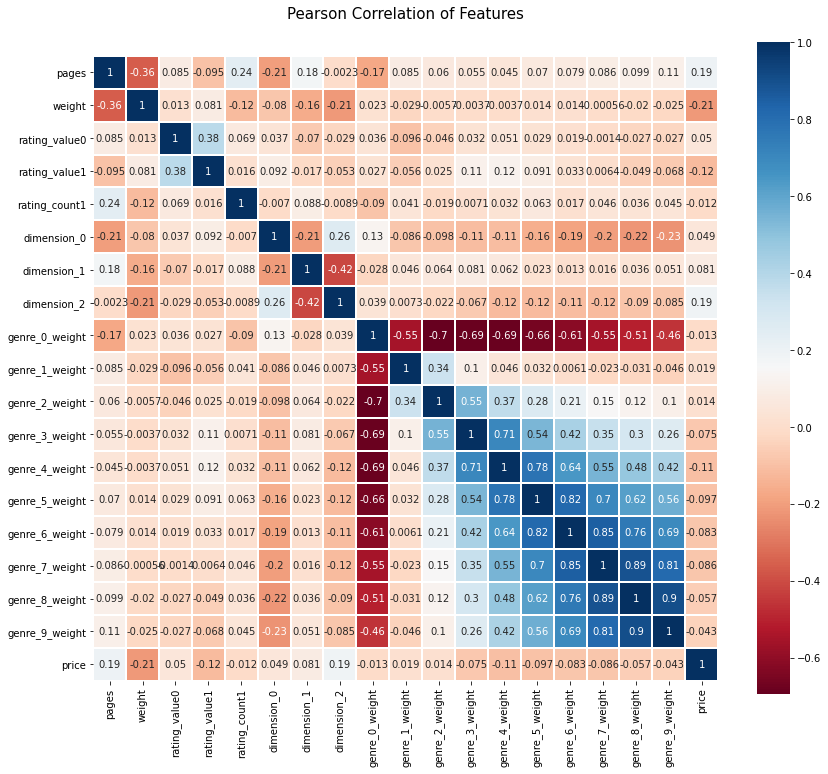

In [12]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [13]:
df.isnull().sum()

title               10
author              10
description         51
bookformat          14
bookedition       4222
pages              145
published_date    3054
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [14]:
df[df["title"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df["title"] = df["title"].fillna("No Title")
df["title"].isnull().sum()

0

In [16]:
df.groupby("title")["title"].nunique().sum()

4346

In [17]:
df.isnull().sum()

title                0
author              10
description         51
bookformat          14
bookedition       4222
pages              145
published_date    3054
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [18]:
df[df["author"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
694,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2087,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2540,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2849,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3097,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3104,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3954,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4019,No Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df["author"] = df["author"].fillna("No Author")
df["author"].isnull().sum()

0

In [20]:
df.groupby("author")["author"].nunique().sum()

2943

In [21]:
df.isnull().sum()

title                0
author               0
description         51
bookformat          14
bookedition       4222
pages              145
published_date    3054
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [22]:
df.shape

(4550, 40)

In [23]:
df[df["description"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
694,No Title,No Author,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,You Can Make Anything Sad,Spencer Madsen,NaN,Paperback,NaN,82.0,NaN,NaN,NaN,NaN,...,0.021739,0.016304,0.010870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,When to Rob a Bank,Steven D. Levitt,NaN,Hardcover,NaN,387.0,NaN,NaN,NaN,NaN,...,0.239037,0.099742,0.052451,0.038693,0.036113,0.032674,0.019776,0.018057,0.015477,NaN
1244,Our Best Bites: Mormon Moms in the Kitchen,Sara Wells,NaN,Spiral-bound,NaN,272.0,"February 23, 2011",Shadow Mountain,NaN,NaN,...,0.185185,0.160494,0.049383,0.049383,NaN,NaN,NaN,NaN,NaN,433254.37
1396,The Wheel of Osheim,Mark Lawrence,NaN,Hardcover,NaN,656.0,NaN,NaN,NaN,NaN,...,0.066015,0.051345,0.039120,0.027710,0.022820,0.022005,0.018745,0.017115,0.016300,NaN
1467,Dan and Phil Go Outside,Daniel Howell,NaN,Hardcover,NaN,224.0,NaN,NaN,NaN,NaN,...,0.078431,0.071895,0.032680,0.032680,0.026144,0.019608,0.019608,0.019608,0.019608,NaN
1716,No Title,No Author,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,No Title,No Author,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2087,No Title,No Author,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2540,No Title,No Author,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df["description"] = df["description"].fillna("No Description")
df["description"].isnull().sum()
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,Divergent,Veronica Roth,"In Beatrice Prior's dystopian Chicago, society...",Hardcover,1st edition,487.0,"May 2, 2011",Katherine Tegen Books,14 years and up,HL700L,...,0.222024,0.113507,0.106666,0.093449,0.064917,0.023852,0.019872,0.013714,0.013574,173244.00
1,Shadowfever,Karen Marie Moning,"“Evil is a completely different creature, Mac....",Hardcover,First Edition,608.0,"January 18, 2011",Delacorte Press,NaN,NaN,...,0.208148,0.162019,0.122214,0.083031,0.078781,0.048202,0.031720,0.030787,0.023116,533880.26
2,A Dance with Dragons,George R.R. Martin,Alternate cover edition of ASIN B004XISI4AIn t...,Kindle Edition,NaN,1125.0,NaN,NaN,NaN,NaN,...,0.144885,0.031548,0.023312,0.021093,0.017476,0.016534,0.016473,0.013829,0.012248,NaN
3,City of Fallen Angels,Cassandra Clare,"The Mortal War is over, and sixteen-year-old C...",Hardcover,First Edition,425.0,"April 5, 2011",Margaret K. McElderry Books,14 years and up,HL750L,...,0.243346,0.086831,0.083956,0.061511,0.049763,0.042539,0.038681,0.030545,0.025530,114629.78
4,Bossypants,Tina Fey,"Before Liz Lemon, before ""Weekend Update,"" bef...",Kindle Edition,NaN,283.0,NaN,NaN,NaN,NaN,...,0.179684,0.163715,0.109603,0.076105,0.057850,0.039813,0.028780,0.021013,0.018908,NaN


In [25]:
df.groupby("description")["description"].nunique().sum()

4333

In [26]:
df.isnull().sum()

title                0
author               0
description          0
bookformat          14
bookedition       4222
pages              145
published_date    3054
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [27]:
df[df["bookformat"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
694,No Title,No Author,No Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,Cross My Heart,Katie Klein,True love can blossom in unexpected places. Th...,NaN,NaN,225.0,NaN,NaN,NaN,NaN,...,0.24957,0.141997,0.063683,0.063683,0.056799,0.055077,0.034423,0.03012,0.020654,NaN
1716,No Title,No Author,No Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,No Title,No Author,No Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2087,No Title,No Author,No Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2534,A Love Letter from the Girls Who Feel Everything,Brittainy C. Cherry,Bestselling authors Brittainy C. Cherry and Ka...,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,0.03690,0.022140,0.022140,0.007380,0.007380,NaN,NaN,NaN,NaN,NaN
2540,No Title,No Author,No Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2849,No Title,No Author,No Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3097,No Title,No Author,No Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3104,No Title,No Author,No Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.groupby('bookformat')["title"].nunique()

bookformat
Audio CD                    1
Audiobook                   1
Board Book                  3
Comics                      3
Hardcover                3082
Kindle Edition            289
Library Binding             1
Mass Market Paperback      57
Nook                        3
Paperback                 879
Spiral-bound                2
Trade Paperback             1
Unknown Binding             1
ebook                      40
paperback                   2
Name: title, dtype: int64

In [29]:
df["bookformat"] = df["bookformat"].fillna("Hardcover")

In [30]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition       4222
pages              145
published_date    3054
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [31]:
df["bookformat"].unique()

array(['Hardcover', 'Kindle Edition', 'Paperback', 'ebook',
       'Mass Market Paperback', 'Audiobook', 'Comics', 'Spiral-bound',
       'Unknown Binding', 'Board Book', 'Library Binding', 'paperback',
       'Audio CD', 'Trade Paperback', 'Nook'], dtype=object)

In [32]:
bookformat_mapping = {"Hardcover":"Hardcover", "Kindle Edition":"Digital Version", "Paperback":"Paperback", "ebook":"Digital Version", "Mass Market Paperback":"Paperback",
                      "Audiobook":"Digital Version", "Comics":"Paperback", "Unknown Binding":"Others", "Board Book":"Others", "Library Binding":"Hardcover", 
                      "paperback":"Paperback", "Audio CD":"Digital Version", "Trade Paperback":"Paperback", "Nook":"Digital Version", "Spiral-bound":"Others"}

df["bookformat"] = df["bookformat"].map(bookformat_mapping).astype(str)

df["bookformat"].unique()

array(['Hardcover', 'Digital Version', 'Paperback', 'Others'],
      dtype=object)

In [33]:
df.loc[df["bookformat"] == "Hardcover", "bookformat"] = 0
df.loc[df["bookformat"] == "Digital Version", "bookformat"] = 1
df.loc[df["bookformat"] == "Paperback", "bookformat"] = 2
df.loc[df["bookformat"] == "Others", "bookformat"] = 3
        
df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,Divergent,Veronica Roth,"In Beatrice Prior's dystopian Chicago, society...",0,1st edition,487.0,"May 2, 2011",Katherine Tegen Books,14 years and up,HL700L,...,0.222024,0.113507,0.106666,0.093449,0.064917,0.023852,0.019872,0.013714,0.013574,173244.00
1,Shadowfever,Karen Marie Moning,"“Evil is a completely different creature, Mac....",0,First Edition,608.0,"January 18, 2011",Delacorte Press,NaN,NaN,...,0.208148,0.162019,0.122214,0.083031,0.078781,0.048202,0.031720,0.030787,0.023116,533880.26
2,A Dance with Dragons,George R.R. Martin,Alternate cover edition of ASIN B004XISI4AIn t...,1,NaN,1125.0,NaN,NaN,NaN,NaN,...,0.144885,0.031548,0.023312,0.021093,0.017476,0.016534,0.016473,0.013829,0.012248,NaN
3,City of Fallen Angels,Cassandra Clare,"The Mortal War is over, and sixteen-year-old C...",0,First Edition,425.0,"April 5, 2011",Margaret K. McElderry Books,14 years and up,HL750L,...,0.243346,0.086831,0.083956,0.061511,0.049763,0.042539,0.038681,0.030545,0.025530,114629.78
4,Bossypants,Tina Fey,"Before Liz Lemon, before ""Weekend Update,"" bef...",1,NaN,283.0,NaN,NaN,NaN,NaN,...,0.179684,0.163715,0.109603,0.076105,0.057850,0.039813,0.028780,0.021013,0.018908,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Mo' Meta Blues: The World According to Questlove,Ahmir Questlove Thompson,MO' META BLUESThe World According to Questlove...,0,First Edition (U.S.),288.0,NaN,NaN,NaN,NaN,...,0.231293,0.163265,0.119728,0.039456,0.032653,0.023129,0.016327,0.014966,0.012245,NaN
4546,My Beloved World,Sonia Sotomayor,The first Latinx (Puerto Rican) and third woma...,0,NaN,302.0,NaN,NaN,NaN,NaN,...,0.259638,0.163957,0.061774,0.049698,0.049698,0.046447,0.046447,0.026475,0.019972,NaN
4547,Coming Clean,Kimberly Rae Miller,A stunning memoir about a childhood spent grow...,0,NaN,272.0,NaN,NaN,NaN,NaN,...,0.312092,0.076797,0.068627,0.060458,0.040850,0.037582,0.037582,0.024510,0.022876,NaN
4548,After Visiting Friends: A Son's Story,Michael Hainey,Michael Hainey had just turned six when his un...,0,NaN,307.0,NaN,NaN,NaN,NaN,...,0.358423,0.087814,0.062724,0.028674,0.019713,0.019713,0.017921,0.017921,0.012545,NaN


In [34]:
df.shape

(4550, 40)

In [35]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition       4222
pages              145
published_date    3054
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [36]:
df[df["bookedition"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
2,A Dance with Dragons,George R.R. Martin,Alternate cover edition of ASIN B004XISI4AIn t...,1,NaN,1125.0,NaN,NaN,NaN,NaN,...,0.144885,0.031548,0.023312,0.021093,0.017476,0.016534,0.016473,0.013829,0.012248,NaN
4,Bossypants,Tina Fey,"Before Liz Lemon, before ""Weekend Update,"" bef...",1,NaN,283.0,NaN,NaN,NaN,NaN,...,0.179684,0.163715,0.109603,0.076105,0.057850,0.039813,0.028780,0.021013,0.018908,NaN
6,A Discovery of Witches,Deborah Harkness,A richly inventive novel about a centuries-old...,0,NaN,579.0,"February 8, 2011",Viking,NaN,NaN,...,0.117674,0.114122,0.100764,0.072697,0.058799,0.046213,0.045711,0.033241,0.031889,285130.75
7,Miss Peregrine's Home for Peculiar Children,Ransom Riggs,Alternate Cover edition for ISBN 9781594744761...,0,NaN,352.0,NaN,NaN,NaN,NaN,...,0.254275,0.128406,0.067249,0.051299,0.038880,0.031193,0.031036,0.025153,0.020211,NaN
8,Delirium,Lauren Oliver,"In an alternate United States, love has been d...",0,NaN,441.0,"February 1, 2011",HarperCollins,14 years and up,920L,...,0.269133,0.156495,0.068240,0.063334,0.061470,0.020653,0.013295,0.010253,0.010253,246728.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,Wave,Sonali Deraniyagala,"On the morning of December 26, 2004, on the so...",1,NaN,274.0,NaN,NaN,NaN,NaN,...,0.361842,0.079605,0.055263,0.032237,0.030263,0.021711,0.020395,0.014474,0.013816,NaN
4546,My Beloved World,Sonia Sotomayor,The first Latinx (Puerto Rican) and third woma...,0,NaN,302.0,NaN,NaN,NaN,NaN,...,0.259638,0.163957,0.061774,0.049698,0.049698,0.046447,0.046447,0.026475,0.019972,NaN
4547,Coming Clean,Kimberly Rae Miller,A stunning memoir about a childhood spent grow...,0,NaN,272.0,NaN,NaN,NaN,NaN,...,0.312092,0.076797,0.068627,0.060458,0.040850,0.037582,0.037582,0.024510,0.022876,NaN
4548,After Visiting Friends: A Son's Story,Michael Hainey,Michael Hainey had just turned six when his un...,0,NaN,307.0,NaN,NaN,NaN,NaN,...,0.358423,0.087814,0.062724,0.028674,0.019713,0.019713,0.017921,0.017921,0.012545,NaN


In [37]:
df.groupby('bookedition')["title"].nunique()

bookedition
1                  3
1 edition          3
1st               10
1st                2
1st Edition       28
                  ..
Yen                1
deckle edge        1
eBook              1
first              1
second edition     1
Name: title, Length: 76, dtype: int64

In [38]:
df["bookedition"] = df["bookedition"].fillna("First Edition")

In [39]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages              145
published_date    3054
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [40]:
df["bookedition"].unique()

array(['1st edition', 'First Edition', 'US', 'First edition ',
       '1st Edition', '1st ', 'Berkley Sensation', 'PDF Version',
       'First Edition (U.S.)', 'Original Edition', 'Yen', 'Trade',
       'Boxed Set', 'First', "Collectors' Edition", '1st',
       'First American Edition',
       '1st Scribner hardcover edition (US/CAN)',
       'First North American Edition', 'Deckle edge',
       'First Scribner Hardcover Edition', 'First ', 'US edition',
       'Sign of Love, Sagittarius', '1 edition', 'Manga Classics',
       'First edition', 'International Edition', 'Large Print Edition',
       'Premiere', 'Deluxe Edition', 'second edition', 'Hardcover',
       'First American', 'Large Print', 'US Edition',
       'Special Rehearsal Edition Script, UK', 'Deckle Edge',
       'Movie tie-in Edition', 'Graphic Novel', '2', 'deckle edge', '1',
       'UK', 'First Simon & Schuster hardcover edition', 'First Printing',
       'First Edition (US/CAN)', '1st US edition', '2nd Edition',
    

In [41]:
FIRST="First Edition"
US="US Edition"
SECOND="Second Edition"
SPECIAL="Special Edition"
UK="UK Edition"
OTHERS="Others"
BASIC="Basic Edition"
INTERNATIONAL="International Edition"
DIGITAL="Digital Edition"
LARGE="Large Print Edition"

bookedition_df = df["bookedition"].copy()

for data in bookedition_df:
  if operator.contains(data.lower(), "first"):
    bookedition_df[bookedition_df==data] = FIRST
  elif operator.contains(data.lower(), "1st"):
    bookedition_df[bookedition_df==data] = FIRST
  elif operator.contains(data.lower(), "1"):
    bookedition_df[bookedition_df==data] = FIRST
  elif operator.contains(data.lower(), "uk"):
    bookedition_df[bookedition_df==data] = UK
  elif operator.contains(data.lower(), "us"):
    bookedition_df[bookedition_df==data] = US
  elif operator.contains(data.lower(), "boxed set"):
    bookedition_df[bookedition_df==data] = SPECIAL
  elif operator.contains(data.lower(), "special"):
    bookedition_df[bookedition_df==data] = SPECIAL
  elif operator.contains(data.lower(), "collectors"):
    bookedition_df[bookedition_df==data] = SPECIAL
  elif operator.contains(data.lower(), "premiere"):
    bookedition_df[bookedition_df==data] = SPECIAL
  elif operator.contains(data.lower(), "deluxe"):
    bookedition_df[bookedition_df==data] = SPECIAL
  elif operator.contains(data.lower(), "basic"):
    bookedition_df[bookedition_df==data] = BASIC
  elif operator.contains(data.lower(), "second"):
    bookedition_df[bookedition_df==data] = SECOND
  elif operator.contains(data.lower(), "2nd"):
    bookedition_df[bookedition_df==data] = SECOND
  elif operator.contains(data.lower(), "2"):
    bookedition_df[bookedition_df==data] = SECOND
  elif operator.contains(data.lower(), "international"):
    bookedition_df[bookedition_df==data] = INTERNATIONAL
  elif operator.contains(data.lower(), "ebook"):
    bookedition_df[bookedition_df==data] = DIGITAL
  elif operator.contains(data.lower(), "pdf version"):
    bookedition_df[bookedition_df==data] = DIGITAL
  elif operator.contains(data.lower(), "large print"):
    bookedition_df[bookedition_df==data] = LARGE
  else:
    bookedition_df[bookedition_df==data] = OTHERS

In [42]:
df["bookedition"] = bookedition_df
df["bookedition"].unique()

array(['First Edition', 'US Edition', 'Others', 'Digital Edition',
       'Special Edition', 'International Edition', 'Large Print Edition',
       'Second Edition', 'UK Edition', 'Basic Edition'], dtype=object)

In [43]:
df.loc[df["bookedition"] == FIRST, "bookedition"] = 0
df.loc[df["bookedition"] == UK, "bookedition"] = 1
df.loc[df["bookedition"] == US, "bookedition"] = 2
df.loc[df["bookedition"] == SPECIAL, "bookedition"] = 3
df.loc[df["bookedition"] == BASIC, "bookedition"] = 4
df.loc[df["bookedition"] == SECOND, "bookedition"] = 5
df.loc[df["bookedition"] == INTERNATIONAL, "bookedition"] = 6
df.loc[df["bookedition"] == DIGITAL, "bookedition"] = 7
df.loc[df["bookedition"] == LARGE, "bookedition"] = 8
df.loc[df["bookedition"] == OTHERS, "bookedition"] = 9
        
df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,Divergent,Veronica Roth,"In Beatrice Prior's dystopian Chicago, society...",0,0,487.0,"May 2, 2011",Katherine Tegen Books,14 years and up,HL700L,...,0.222024,0.113507,0.106666,0.093449,0.064917,0.023852,0.019872,0.013714,0.013574,173244.00
1,Shadowfever,Karen Marie Moning,"“Evil is a completely different creature, Mac....",0,0,608.0,"January 18, 2011",Delacorte Press,NaN,NaN,...,0.208148,0.162019,0.122214,0.083031,0.078781,0.048202,0.031720,0.030787,0.023116,533880.26
2,A Dance with Dragons,George R.R. Martin,Alternate cover edition of ASIN B004XISI4AIn t...,1,0,1125.0,NaN,NaN,NaN,NaN,...,0.144885,0.031548,0.023312,0.021093,0.017476,0.016534,0.016473,0.013829,0.012248,NaN
3,City of Fallen Angels,Cassandra Clare,"The Mortal War is over, and sixteen-year-old C...",0,0,425.0,"April 5, 2011",Margaret K. McElderry Books,14 years and up,HL750L,...,0.243346,0.086831,0.083956,0.061511,0.049763,0.042539,0.038681,0.030545,0.025530,114629.78
4,Bossypants,Tina Fey,"Before Liz Lemon, before ""Weekend Update,"" bef...",1,0,283.0,NaN,NaN,NaN,NaN,...,0.179684,0.163715,0.109603,0.076105,0.057850,0.039813,0.028780,0.021013,0.018908,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Mo' Meta Blues: The World According to Questlove,Ahmir Questlove Thompson,MO' META BLUESThe World According to Questlove...,0,0,288.0,NaN,NaN,NaN,NaN,...,0.231293,0.163265,0.119728,0.039456,0.032653,0.023129,0.016327,0.014966,0.012245,NaN
4546,My Beloved World,Sonia Sotomayor,The first Latinx (Puerto Rican) and third woma...,0,0,302.0,NaN,NaN,NaN,NaN,...,0.259638,0.163957,0.061774,0.049698,0.049698,0.046447,0.046447,0.026475,0.019972,NaN
4547,Coming Clean,Kimberly Rae Miller,A stunning memoir about a childhood spent grow...,0,0,272.0,NaN,NaN,NaN,NaN,...,0.312092,0.076797,0.068627,0.060458,0.040850,0.037582,0.037582,0.024510,0.022876,NaN
4548,After Visiting Friends: A Son's Story,Michael Hainey,Michael Hainey had just turned six when his un...,0,0,307.0,NaN,NaN,NaN,NaN,...,0.358423,0.087814,0.062724,0.028674,0.019713,0.019713,0.017921,0.017921,0.012545,NaN


In [44]:
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,Divergent,Veronica Roth,"In Beatrice Prior's dystopian Chicago, society...",0,0,487.0,"May 2, 2011",Katherine Tegen Books,14 years and up,HL700L,...,0.222024,0.113507,0.106666,0.093449,0.064917,0.023852,0.019872,0.013714,0.013574,173244.00
1,Shadowfever,Karen Marie Moning,"“Evil is a completely different creature, Mac....",0,0,608.0,"January 18, 2011",Delacorte Press,NaN,NaN,...,0.208148,0.162019,0.122214,0.083031,0.078781,0.048202,0.031720,0.030787,0.023116,533880.26
2,A Dance with Dragons,George R.R. Martin,Alternate cover edition of ASIN B004XISI4AIn t...,1,0,1125.0,NaN,NaN,NaN,NaN,...,0.144885,0.031548,0.023312,0.021093,0.017476,0.016534,0.016473,0.013829,0.012248,NaN
3,City of Fallen Angels,Cassandra Clare,"The Mortal War is over, and sixteen-year-old C...",0,0,425.0,"April 5, 2011",Margaret K. McElderry Books,14 years and up,HL750L,...,0.243346,0.086831,0.083956,0.061511,0.049763,0.042539,0.038681,0.030545,0.025530,114629.78
4,Bossypants,Tina Fey,"Before Liz Lemon, before ""Weekend Update,"" bef...",1,0,283.0,NaN,NaN,NaN,NaN,...,0.179684,0.163715,0.109603,0.076105,0.057850,0.039813,0.028780,0.021013,0.018908,NaN


In [45]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages              145
published_date    3054
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [46]:
df[df["pages"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
673,10-Day Green Smoothie Cleanse: Lose Up to 15 P...,J.J. Smith,The 10-Day Green Smoothie Cleanse will jump-st...,1,0,NaN,NaN,NaN,NaN,NaN,...,0.227513,0.195767,0.095238,0.074074,0.047619,0.031746,0.026455,0.021164,0.015873,NaN
694,No Title,No Author,No Description,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,Jessica's Journal: A Book of Poetry,Kathryn Perez,While Jessica endured the torment of bullying ...,1,0,NaN,NaN,NaN,NaN,NaN,...,0.055556,0.037037,0.037037,0.037037,0.037037,NaN,NaN,NaN,NaN,NaN
1716,No Title,No Author,No Description,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,No Title,No Author,No Description,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,A Script for Aspiring Women Leaders: 5 Keys to...,Mark Villareal,A Script For Aspiring Women Leaders: 5 Keys To...,2,0,NaN,"September 24, 2020",Mr. V. Consulting Services,NaN,NaN,...,0.312500,0.187500,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,219586.77
4029,Learning to D.A.N.C.E. With Your Demons: A Gui...,Francesca Flood,No Description,1,0,NaN,"February 25, 2021",Hope Verdad LLC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72040.63
4030,Guerra sin armas: Porque sí hay invasiones ven...,Nickole Naihaus L.,No Description,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63
4032,An Unexpected Healer,Lucho Castillo,Carlos Taino was living a simple life in Washi...,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63


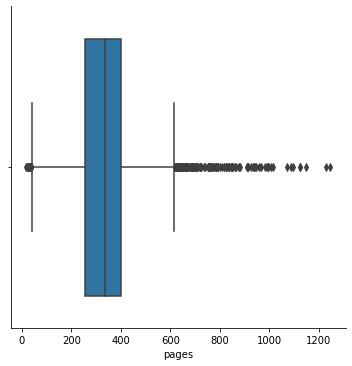

In [47]:
sns.catplot(x="pages", kind="box", data=df)

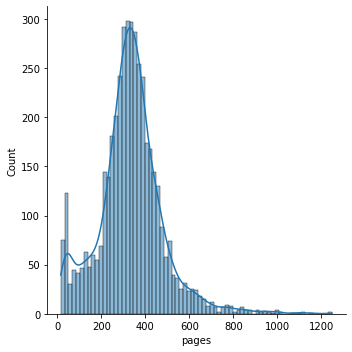

In [48]:
sns.displot(df, x="pages", kde=True)

In [49]:
df["pages"].describe()

count    4405.000000
mean      333.877412
std       148.060232
min        16.000000
25%       256.000000
50%       334.000000
75%       400.000000
max      1248.000000
Name: pages, dtype: float64

In [50]:
pages_median = df["pages"].median()
pages_median

334.0

In [51]:
df["pages"] = df["pages"].fillna(pages_median)
df["pages"].isnull().sum()

0

In [52]:
df["pages"] = df["pages"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4550 non-null   object 
 1   author          4550 non-null   object 
 2   description     4550 non-null   object 
 3   bookformat      4550 non-null   object 
 4   bookedition     4550 non-null   object 
 5   pages           4550 non-null   int32  
 6   published_date  1496 non-null   object 
 7   publisher       1496 non-null   object 
 8   reading_age     371 non-null    object 
 9   lexile_measure  271 non-null    object 
 10  grade_level     303 non-null    object 
 11  weight          1381 non-null   float64
 12  rating_value0   4540 non-null   float64
 13  rating_value1   1434 non-null   float64
 14  rating_count0   4540 non-null   object 
 15  rating_count1   1434 non-null   float64
 16  dimension_0     1373 non-null   float64
 17  dimension_1     1373 non-null   f

In [53]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date    3054
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [54]:
df.shape

(4550, 40)

In [55]:
df[df["published_date"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
2,A Dance with Dragons,George R.R. Martin,Alternate cover edition of ASIN B004XISI4AIn t...,1,0,1125,NaN,NaN,NaN,NaN,...,0.144885,0.031548,0.023312,0.021093,0.017476,0.016534,0.016473,0.013829,0.012248,NaN
4,Bossypants,Tina Fey,"Before Liz Lemon, before ""Weekend Update,"" bef...",1,0,283,NaN,NaN,NaN,NaN,...,0.179684,0.163715,0.109603,0.076105,0.057850,0.039813,0.028780,0.021013,0.018908,NaN
7,Miss Peregrine's Home for Peculiar Children,Ransom Riggs,Alternate Cover edition for ISBN 9781594744761...,0,0,352,NaN,NaN,NaN,NaN,...,0.254275,0.128406,0.067249,0.051299,0.038880,0.031193,0.031036,0.025153,0.020211,NaN
10,Forever,Maggie Stiefvater,"then.When Sam met Grace, he was a wolf and she...",0,0,390,NaN,NaN,NaN,NaN,...,0.215623,0.132717,0.123579,0.091709,0.040784,0.036996,0.036216,0.033207,0.018944,NaN
48,Rules of Civility,Amor Towles,"Na última noite de 1937, Katey desliza deslumb...",0,0,335,NaN,NaN,NaN,NaN,...,0.366713,0.055892,0.037417,0.030741,0.030275,0.027480,0.022357,0.020183,0.018320,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Mo' Meta Blues: The World According to Questlove,Ahmir Questlove Thompson,MO' META BLUESThe World According to Questlove...,0,0,288,NaN,NaN,NaN,NaN,...,0.231293,0.163265,0.119728,0.039456,0.032653,0.023129,0.016327,0.014966,0.012245,NaN
4546,My Beloved World,Sonia Sotomayor,The first Latinx (Puerto Rican) and third woma...,0,0,302,NaN,NaN,NaN,NaN,...,0.259638,0.163957,0.061774,0.049698,0.049698,0.046447,0.046447,0.026475,0.019972,NaN
4547,Coming Clean,Kimberly Rae Miller,A stunning memoir about a childhood spent grow...,0,0,272,NaN,NaN,NaN,NaN,...,0.312092,0.076797,0.068627,0.060458,0.040850,0.037582,0.037582,0.024510,0.022876,NaN
4548,After Visiting Friends: A Son's Story,Michael Hainey,Michael Hainey had just turned six when his un...,0,0,307,NaN,NaN,NaN,NaN,...,0.358423,0.087814,0.062724,0.028674,0.019713,0.019713,0.017921,0.017921,0.012545,NaN


In [56]:
df.groupby("published_date")["title"].nunique()

published_date
1 i                  1
April 1, 2009        1
April 1, 2011        3
April 1, 2012        4
April 1, 2013        1
                    ..
September 5, 2020    1
September 6, 2011    2
September 7, 2011    1
September 7, 2021    6
September 9, 2014    8
Name: title, Length: 428, dtype: int64

In [57]:
df["published_date"].unique()

array(['May 2, 2011', 'January 18, 2011', nan, 'April 5, 2011',
       'March 1, 2011', 'February 8, 2011', 'February 1, 2011',
       'May 3, 2011', 'June 7, 2011', 'February 22, 2011',
       'January 4, 2011', 'September 13, 2011', 'October 4, 2011',
       'August 23, 2011', 'September 27, 2011', 'August 16, 2011',
       'October 25, 2011', 'March 22, 2011', '1 i', 'March 8, 2011',
       'October 11, 2011', 'May 4, 2011', 'September 7, 2011',
       'January 1, 2011', 'April 26, 2011', 'April 15, 2011',
       'May 24, 2011', 'June 14, 2011', 'August 30, 2011', 'July 5, 2011',
       'February 15, 2011', 'May 31, 2011', 'June 28, 2011',
       'July 26, 2011', 'April 28, 2011', 'August 9, 2011',
       'April 1, 2009', 'November 7, 2011', 'May 17, 2011',
       'September 1, 2011', 'June 29, 2011', 'August 1, 2011',
       'May 1, 2011', 'November 8, 2011', 'September 20, 2011',
       'March 29, 2011', 'October 1, 2011', 'July 1, 2011',
       'September 6, 2011', 'August 2, 201

In [58]:
df["published_date"] = df["published_date"].fillna("Other")
df["published_date"].isnull().sum()

0

In [59]:
published_date_df = df["published_date"].copy()

for data in published_date_df:
  if operator.contains(data, "2011"):
    published_date_df[published_date_df==data] = "2011"
  elif operator.contains(data, "2012"):
    published_date_df[published_date_df==data] = "2012"
  elif operator.contains(data, "2013"):
    published_date_df[published_date_df==data] = "2013"
  elif operator.contains(data, "2014"):
    published_date_df[published_date_df==data] = "2014"
  elif operator.contains(data, "2015"):
    published_date_df[published_date_df==data] = "2015"
  elif operator.contains(data, "2016"):
    published_date_df[published_date_df==data] = "2016"
  elif operator.contains(data, "2017"):
    published_date_df[published_date_df==data] = "2017"
  elif operator.contains(data, "2018"):
    published_date_df[published_date_df==data] = "2018"
  elif operator.contains(data, "2019"):
    published_date_df[published_date_df==data] = "2019"
  elif operator.contains(data, "2020"):
    published_date_df[published_date_df==data] = "2020"
  elif operator.contains(data, "2021"):
    published_date_df[published_date_df==data] = "2021"
  else:
    published_date_df[published_date_df==data] = "2013" # Median

In [60]:
df["published_date"] = published_date_df.astype(int)
df["published_date"].unique()

array([2011, 2013, 2014, 2012, 2017, 2021, 2020, 2015, 2018, 2019])

<AxesSubplot:xlabel='Count', ylabel='published_date'>

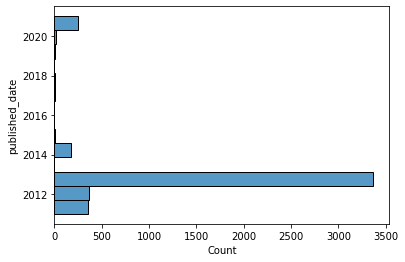

In [61]:
sns.histplot(df,y="published_date")

In [62]:
df = df.sort_values(by=['published_date'])
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,Divergent,Veronica Roth,"In Beatrice Prior's dystopian Chicago, society...",0,0,487,2011,Katherine Tegen Books,14 years and up,HL700L,...,0.222024,0.113507,0.106666,0.093449,0.064917,0.023852,0.019872,0.013714,0.013574,173244.00
2364,Hark! A Vagrant,Kate Beaton,Hark! A Vagrant is an uproarious romp through ...,0,0,168,2011,Drawn and Quarterly,NaN,NaN,...,0.271049,0.146233,0.112506,0.037420,0.028311,0.027326,0.026588,0.024126,0.016002,120548.95
2363,"Twilight: The Graphic Novel, Vol. 2",Young Kim,Having uncovered the dark secret of her enigma...,0,0,240,2011,Yen Press,14 years and up,NaN,...,0.149458,0.146570,0.106137,0.102527,0.070036,0.069314,0.053430,0.031769,0.020939,519010.15
2362,"The Walking Dead, Vol. 14: No Way Out",Robert Kirkman,The survivors of Robert Kirkman and Charlie Ad...,2,0,136,2011,Image Comics,16 years and up,NaN,...,0.241608,0.162587,0.118531,0.055245,0.033217,0.027273,0.026224,0.016084,0.012587,170212.23
2361,Buffy the Vampire Slayer: Last Gleaming,Joss Whedon,"The season finale is here! At long last, the B...",2,0,168,2011,Dark Horse,NaN,NaN,...,0.234398,0.129173,0.084906,0.057329,0.054427,0.039913,0.029753,0.025399,0.025399,607075.85


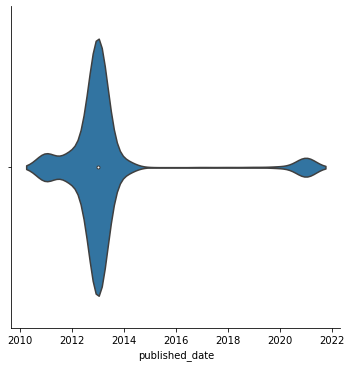

In [63]:
date_df = df
date_df["published_date"] = df["published_date"].astype(int)
sns.catplot(data=date_df, x="published_date", kind="violin")

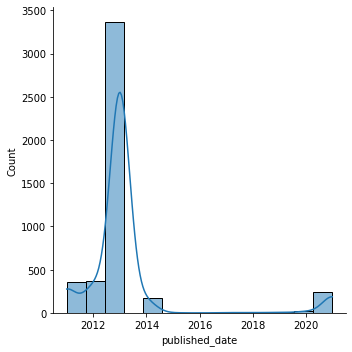

In [64]:
sns.displot(df, x="published_date", kde=True)

In [65]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher         3054
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [66]:
df.shape

(4550, 40)

In [67]:
df["publisher"].unique()

array(['Katherine Tegen Books', 'Drawn and Quarterly', 'Yen Press',
       'Image Comics', 'Dark Horse', 'Razorbill', 'Greenwillow Books',
       'Dutton Books for Young Readers', 'Viking Books for Young Readers',
       'Little, Brown Books for Young Readers', 'Scholastic Press',
       'Hyperion Books for Children',
       'Simon & Schuster Books for Young Readers', 'Balzer + Bray',
       'HMH Books for Young Readers', 'Roaring Brook Press',
       'Andrews McMeel Publishing', "St. Martin's Griffin",
       'First Second', 'Pantheon', 'Coffee House Press',
       'W. W. Norton & Company', 'Graywolf Press', 'Black Ocean',
       'Tupelo Press', 'Knopf', 'Wesleyan', 'Quirk Books', 'Random House',
       'Kids Can Press', 'Arcana Studio', 'Graphix', 'Marvel', 'Vertigo',
       'Del Rey', 'IDW Publishing', 'Candlewick', 'HarperCollins',
       'Hyperion Book CH', 'HarperTeen', 'Delacorte Press',
       'Simon & Schuster', 'Harlequin Teen', 'Penguin Press',
       'Houghton Mifflin Harco

In [68]:
df.groupby("publisher")["title"].nunique()

publisher
47North                          3
A John Scognamiglio Book         1
Abrams ComicArts - Megascope     1
Abrams Press                     3
Ace                             26
                                ..
Zebra                            2
Zenith Publishing                1
Zirac Press                      1
Zondervan                        1
lulu.com                         1
Name: title, Length: 420, dtype: int64

In [69]:
df["publisher"] = df["publisher"].fillna("No Publisher")
df["publisher"].isnull().sum()

0

In [70]:
df.groupby("publisher")["publisher"].nunique().sum()

421

In [71]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age       4179
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [72]:
df["reading_age"].unique()

array(['14 years and up', nan, '16 years and up', '12 - 17 years',
       'Baby - 5 years', '3 - 5 years', '2 - 5 years', '1 - 8 years',
       '3 - 6 years', '4 - 8 years', '6 - 9 years', '5 - 9 years',
       '13 - 17 years', '9 - 12 years', '13 years and up',
       '12 - 18 years', '8 - 12 years', '11 years and up',
       '14 - 17 years', '12 - 15 years', '15 years and up',
       '10 - 12 years', '10 - 14 years', '9 years and up', '6 - 8 years',
       '12 years and up', '18 years and up', '11 - 15 years',
       'Baby and up', '21 years and up', '17 years and up',
       'Baby - 12 years', '5 - 8 years', '2 - 6 years', '4 - 7 years',
       '5 - 7 years', '3 - 7 years', '3 - 8 years', '10 years',
       '10 years and up', '10 - 13 years', '14 - 18 years',
       '8 years and up', '8 - 11 years', '13 - 16 years', '12 - 16 years',
       '12 years', '9 - 13 years', '13 - 18 years', '15 - 17 years',
       '6 - 11 years', '4 - 6 years'], dtype=object)

In [73]:
df[df["reading_age"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
2364,Hark! A Vagrant,Kate Beaton,Hark! A Vagrant is an uproarious romp through ...,0,0,168,2011,Drawn and Quarterly,NaN,NaN,...,0.271049,0.146233,0.112506,0.037420,0.028311,0.027326,0.026588,0.024126,0.016002,120548.95
2361,Buffy the Vampire Slayer: Last Gleaming,Joss Whedon,"The season finale is here! At long last, the B...",2,0,168,2011,Dark Horse,NaN,NaN,...,0.234398,0.129173,0.084906,0.057329,0.054427,0.039913,0.029753,0.025399,0.025399,607075.85
2365,5 Very Good Reasons to Punch a Dolphin in the ...,Matthew Inman,Prepare to laugh your ass off. The hilarity of...,2,0,160,2011,Andrews McMeel Publishing,NaN,NaN,...,0.192389,0.167019,0.081395,0.078224,0.022199,0.015856,0.010571,0.006342,0.005285,175842.66
2368,Habibi,Craig Thompson,From the internationally acclaimed author of B...,0,0,672,2011,Pantheon,NaN,NaN,...,0.229971,0.102009,0.034755,0.029113,0.026405,0.021214,0.019183,0.015798,0.013992,207748.43
2389,Testify,Joseph Lease,"With singular grace and musicality, these acco...",2,0,75,2011,Coffee House Press,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82002.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,NaN,NaN,...,0.157303,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,NaN,NaN,...,0.350000,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63


In [74]:
total = 0
for i in range(1,18):
  total+=i
total/len(range(1,18))

9.0

In [75]:
df["reading_age"] = df["reading_age"].fillna("9")
df["reading_age"].unique()

array(['14 years and up', '9', '16 years and up', '12 - 17 years',
       'Baby - 5 years', '3 - 5 years', '2 - 5 years', '1 - 8 years',
       '3 - 6 years', '4 - 8 years', '6 - 9 years', '5 - 9 years',
       '13 - 17 years', '9 - 12 years', '13 years and up',
       '12 - 18 years', '8 - 12 years', '11 years and up',
       '14 - 17 years', '12 - 15 years', '15 years and up',
       '10 - 12 years', '10 - 14 years', '9 years and up', '6 - 8 years',
       '12 years and up', '18 years and up', '11 - 15 years',
       'Baby and up', '21 years and up', '17 years and up',
       'Baby - 12 years', '5 - 8 years', '2 - 6 years', '4 - 7 years',
       '5 - 7 years', '3 - 7 years', '3 - 8 years', '10 years',
       '10 years and up', '10 - 13 years', '14 - 18 years',
       '8 years and up', '8 - 11 years', '13 - 16 years', '12 - 16 years',
       '12 years', '9 - 13 years', '13 - 18 years', '15 - 17 years',
       '6 - 11 years', '4 - 6 years'], dtype=object)

In [76]:
"""
Kurang dari sama dengan 1 : 0
2-5 : 1 
6-9 : 2
10-13 : 3
14-17 : 4
18 keatas : 5
Note : Ambil nilai terbawahnya
"""
reading_age_mapping = {"14 years and up":4, "9":3, "12 - 18 years":3, "16 years and up":4, "12 - 17 years":3, "4 - 8 years":1, "3 - 5 years":1, "2 - 5 years":1
                       , "1 - 8 years":0, "3 - 6 years":1, "6 - 9 years":2, "5 - 9 years":1, "13 - 17 years":3, "9 - 12 years":2, "13 years and up":3, 
                       "12 - 18 years":3, "8 - 12 years":2, "11 years and up":3, "14 - 17 years":4, "12 - 15 years":3, "15 years and up":4, "10 - 12 years":3,
                       "10 - 14 years":3, "9 years and up":2, "6 - 8 years":2, "12 years and up":3, "18 years and up":5, "11 - 15 years":3, "Baby and up":0,
                       "Baby - 5 years":0, "21 years and up": 5, "3 - 8 years":1, "8 years and up":2, "14 - 18 years":4, "10 - 13 years":3, "10 years and up":3, 
                       "2 - 6 years":1, "5 - 8 years":1, "3 - 7 years":1, "5 - 7 years":1, "17 years and up":4, "Baby - 12 years":0, "13 - 16 years":3,
                       "10 years":3, "12 - 16 years":3, "4 - 7 years":1, "8 - 11 years":2, "12 years":3, "9 - 13 years":2, "13 - 18 years":3, "15 - 17 years":4,
                       "6 - 11 years":2, "4 - 6 years":1}

df["reading_age"] = df["reading_age"].map(reading_age_mapping).astype(int)

df["reading_age"].unique()

array([4, 3, 0, 1, 2, 5])

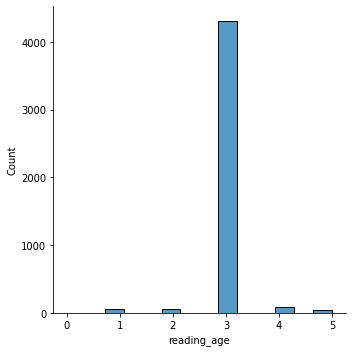

In [77]:
sns.displot(df, x="reading_age")

In [78]:
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,Divergent,Veronica Roth,"In Beatrice Prior's dystopian Chicago, society...",0,0,487,2011,Katherine Tegen Books,4,HL700L,...,0.222024,0.113507,0.106666,0.093449,0.064917,0.023852,0.019872,0.013714,0.013574,173244.00
2364,Hark! A Vagrant,Kate Beaton,Hark! A Vagrant is an uproarious romp through ...,0,0,168,2011,Drawn and Quarterly,3,NaN,...,0.271049,0.146233,0.112506,0.037420,0.028311,0.027326,0.026588,0.024126,0.016002,120548.95
2363,"Twilight: The Graphic Novel, Vol. 2",Young Kim,Having uncovered the dark secret of her enigma...,0,0,240,2011,Yen Press,4,NaN,...,0.149458,0.146570,0.106137,0.102527,0.070036,0.069314,0.053430,0.031769,0.020939,519010.15
2362,"The Walking Dead, Vol. 14: No Way Out",Robert Kirkman,The survivors of Robert Kirkman and Charlie Ad...,2,0,136,2011,Image Comics,4,NaN,...,0.241608,0.162587,0.118531,0.055245,0.033217,0.027273,0.026224,0.016084,0.012587,170212.23
2361,Buffy the Vampire Slayer: Last Gleaming,Joss Whedon,"The season finale is here! At long last, the B...",2,0,168,2011,Dark Horse,3,NaN,...,0.234398,0.129173,0.084906,0.057329,0.054427,0.039913,0.029753,0.025399,0.025399,607075.85


In [79]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure    4279
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [80]:
df["lexile_measure"].unique()

array(['HL700L', nan, 'AD470L', 'AD760L', 'AD380L', 'AD740L', 'AD450L',
       'AD490L', '330L', '1060L', 'AD530L', 'AD480L', 'AD460L', 'GN240L',
       'AD660L', 'GN400L', 'IG360L', '230L', '1000L', '900L', '770L',
       'HL660L', 'HL730L', 'HL800L', '790L', 'HL720L', '920L', '860L',
       '670L', 'HL710L', 'HL750L', '850L', '880L', '720L', '690L', '940L',
       '710L', '760L', '870L', '830L', '640L', 'HL650L', 'HL570L',
       'HL670L', 'HL490L', '670', 'HL690L', 'HL680L', '1080L', 'AD510L',
       '950L', '840L', '990L', '990', '730L', '1130L', '1020', '960L',
       '1030L', 'HL590L', '1120L', 'HL760L', 'HL740L', '690', 'HL790L',
       '750L', 'HL580L', 'NP', '700L', '1020L', 'AD350L', 'AD340L',
       '280L', 'AD550L', 'AD620L', 'AD800L', 'AD500L', '130L', 'AD600L',
       'AD650L', '1170L', 'AD520L', 'AD790L', 'AD300L', 'AD630L', '930L',
       '800L', '570L', '740L', 'HL600L', '520L', '560L', 'HL820L',
       '1150L', '1300L', '1260L', 'HL780L', 'GN390L', 'AD590L', '810',
  

In [81]:
df.groupby("lexile_measure")["title"].nunique()

lexile_measure
1000L     2
1010L     1
1020      1
1020L     1
1030L     1
         ..
HL790L    2
HL800L    3
HL820L    1
IG360L    1
NP        7
Name: title, Length: 124, dtype: int64

In [82]:
df = df.sort_values(by="lexile_measure")
df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,1000L,...,0.199275,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,1000L,...,0.274044,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,1010L,...,0.254930,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,1020,...,0.259322,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,1020L,...,0.225913,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,NaN,...,0.157303,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,NaN,...,0.350000,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63


In [83]:
df[df["lexile_measure"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
2364,Hark! A Vagrant,Kate Beaton,Hark! A Vagrant is an uproarious romp through ...,0,0,168,2011,Drawn and Quarterly,3,NaN,...,0.271049,0.146233,0.112506,0.037420,0.028311,0.027326,0.026588,0.024126,0.016002,120548.95
2363,"Twilight: The Graphic Novel, Vol. 2",Young Kim,Having uncovered the dark secret of her enigma...,0,0,240,2011,Yen Press,4,NaN,...,0.149458,0.146570,0.106137,0.102527,0.070036,0.069314,0.053430,0.031769,0.020939,519010.15
2362,"The Walking Dead, Vol. 14: No Way Out",Robert Kirkman,The survivors of Robert Kirkman and Charlie Ad...,2,0,136,2011,Image Comics,4,NaN,...,0.241608,0.162587,0.118531,0.055245,0.033217,0.027273,0.026224,0.016084,0.012587,170212.23
2361,Buffy the Vampire Slayer: Last Gleaming,Joss Whedon,"The season finale is here! At long last, the B...",2,0,168,2011,Dark Horse,3,NaN,...,0.234398,0.129173,0.084906,0.057329,0.054427,0.039913,0.029753,0.025399,0.025399,607075.85
2360,Vampire Academy: The Graphic Novel,Richelle Mead,"After two years on the run, best friends Rose ...",2,0,144,2011,Razorbill,3,NaN,...,0.172389,0.165814,0.089847,0.086194,0.065741,0.055515,0.051132,0.025566,0.023375,187536.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,NaN,...,0.157303,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,NaN,...,0.350000,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63


In [84]:
df["lexile_measure"] = df["lexile_measure"].fillna("Other")
df["lexile_measure"].isnull().sum()

0

In [85]:
lexile_df = df["lexile_measure"].copy()

for data in lexile_df:
  if operator.contains(data, "AD"):
    lexile_df[lexile_df==data] = "0"
  elif operator.contains(data, "GN"):
    lexile_df[lexile_df==data] = "1"
  elif operator.contains(data, "HL"):
    lexile_df[lexile_df==data] = "2"
  elif operator.contains(data, "IG"):
    lexile_df[lexile_df==data] = "3"
  elif operator.contains(data, "NP"):
    lexile_df[lexile_df==data] = "4"
  else:
    lexile_df[lexile_df==data] = "5"

In [86]:
df["lexile_measure"] = lexile_df.astype(int)
df["lexile_measure"].unique()

array([5, 0, 1, 2, 3])

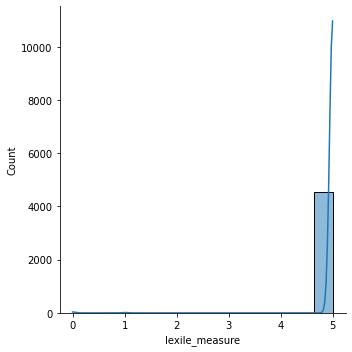

In [87]:
sns.displot(df, x="lexile_measure", kde=True)

In [88]:
df.shape

(4550, 40)

In [89]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
grade_level       4247
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [90]:
df[df["grade_level"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.259322,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55
4171,"Behind the Beautiful Forevers: Life, Death, an...",Katherine Boo,"From Pulitzer Prize-winner Katherine Boo, a la...",0,0,278,2012,Random House,3,5,...,0.152105,0.051645,0.036081,0.032720,0.025469,0.025292,0.023700,0.023523,0.020163,330174.19
1200,Steve Jobs,Walter Isaacson,"Walter Isaacson's ""enthralling"" (The New Yorke...",0,0,627,2011,Simon & Schuster,3,5,...,0.241993,0.125069,0.034718,0.029404,0.026574,0.021811,0.016842,0.014978,0.014426,129933.00
221,Gulp: Adventures on the Alimentary Canal,Mary Roach,“America’s funniest science writer” (Washingto...,0,0,348,2013,W. W. Norton & Company,3,5,...,0.287802,0.059584,0.046093,0.042159,0.033539,0.023984,0.023609,0.021360,0.013865,122281.39
4154,Escape from Camp 14: One Man's Remarkable Odys...,Blaine Harden,"A New York Times bestseller, the shocking stor...",0,0,205,2012,Viking,5,5,...,0.175976,0.110431,0.074726,0.044631,0.035960,0.032390,0.028054,0.017087,0.014792,343600.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.157303,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.350000,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63


In [91]:
df["grade_level"].unique()

array(['Preschool - 3', '7 and up', nan, '9 and up', '3 - 7', '1 - 4',
       '9 - 12', 'Preschool - 2', 'Preschool - Kindergarten', '5 - 6',
       '7 - 12', '5 - 9', '7 - 9', '8 - 9', '4 - 8', '5 - 8', '6 - 9',
       '4 - 6', '10 - 12', '10 and up', '5 - 7', '3 and up', '3 - 6',
       'Kindergarten - 3', 'Kindergarten - 4', '1 - 2', '4 - 7', '8 - 12',
       '8 and up', 'Preschool and up', '1 - 3', 'Preschool - 1',
       'Kindergarten - 2', '11 and up'], dtype=object)

In [92]:
df = df.drop(["grade_level"], axis=1)
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.199275,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.274044,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.254930,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.259322,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.225913,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61


In [93]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight            3169
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [94]:
df.shape

(4550, 39)

In [95]:
df["weight"].describe()

count    1381.000000
mean     2361.206494
std      2331.741810
min        15.875720
25%       580.597760
50%       789.250080
75%      4626.638400
max      7212.112800
Name: weight, dtype: float64

In [96]:
df[df["weight"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
82,Dead Reckoning,Charlaine Harris,An Alternate Cover for this ASIN can be found ...,1,0,336,2011,Gollancz,3,5,...,0.174821,0.140723,0.112145,0.087681,0.079996,0.063975,0.060619,0.053800,0.025655,NaN
9,Dead Reckoning,Charlaine Harris,An Alternate Cover for this ASIN can be found ...,1,0,336,2011,Gollancz,3,5,...,0.174821,0.140723,0.112145,0.087681,0.079996,0.063975,0.060619,0.053800,0.025655,NaN
4103,Love Unrehearsed,Tina Reber,There is no rehearsal for true love.When A-lis...,1,0,448,2012,Atria Books,3,5,...,0.133921,0.125100,0.103448,0.063352,0.045710,0.032879,0.024058,0.019246,0.016038,28729.63
4126,"I, Zombie",Hugh Howey,***WARNING: NOT FIT FOR HUMAN CONSUMPTION***Th...,1,0,222,2012,Broad Reach Publishing,3,5,...,0.291429,0.154286,0.074286,0.065714,0.028571,0.025714,0.020000,0.014286,0.011429,86477.63
1299,Flat-Out Love,Jessica Park,Flat-Out Love is a warm and witty novel of fam...,1,0,389,2012,Skyscape,3,5,...,0.198795,0.162651,0.137048,0.055221,0.051958,0.050452,0.046436,0.021335,0.019829,57603.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,The Seven Pillars of Customer Success: A Prove...,Wayne McCulloch,"As a customer success leader, whose insight do...",1,0,334,2021,Lioncrest Publishing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144225.63
3986,Steal the Demon,Robert Roth,As an ace pilot (and occasional smuggler) at h...,1,0,334,2021,Jetspace Studio,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63
3988,Scarred,Eva Winners,SERIES BLURBWhen powers clash between the powe...,1,0,367,2021,Winners Publishing LLC,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63
3845,Runaway Train,Lee Matthew Goldberg,They told me I was an out-of-control train abo...,1,0,334,2021,Wise Wolf Books,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72040.63


In [97]:
print("Weight Mean : {} , Weight Median : {}".format(df["weight"].mean(), df["weight"].median()))

Weight Mean : 2361.206493862419 , Weight Median : 789.25008


In [98]:
df["weight"] = df["weight"].fillna(df["weight"].median())
df["weight"].isnull().sum()

0

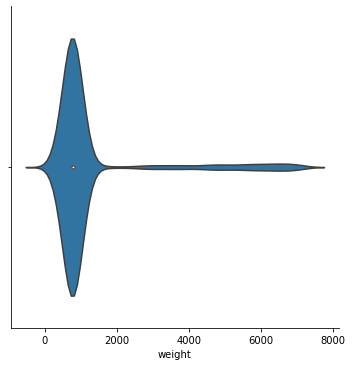

In [99]:
sns.catplot(data=df, x="weight", kind="violin")

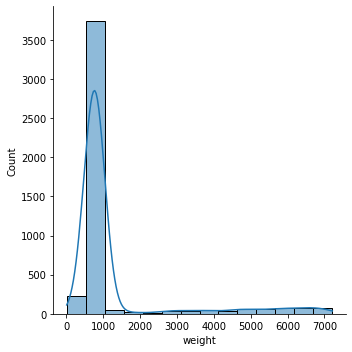

In [100]:
sns.displot(df, x="weight", kde=True)

In [101]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight               0
rating_value0       10
rating_value1     3116
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [102]:
df["rating_value0"].describe()

count    4540.000000
mean        4.008782
std         0.599352
min         0.000000
25%         3.870000
50%         4.070000
75%         4.260000
max         5.000000
Name: rating_value0, dtype: float64

In [103]:
print("Rating_value0 Mean : {} , Rating_value0 Median : {}".format(df["rating_value0"].mean(), df["rating_value0"].median()))

Rating_value0 Mean : 4.008781938325992 , Rating_value0 Median : 4.07


In [104]:
df["rating_value0"] = df["rating_value0"].fillna(df["rating_value0"].median())
df["rating_value0"].isnull().sum()

0

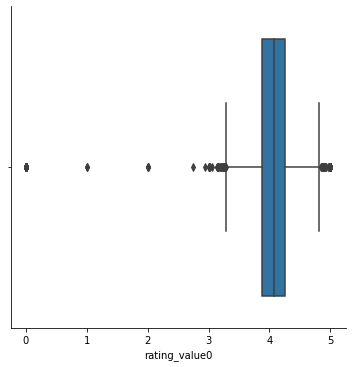

In [105]:
sns.catplot(data=df, x="rating_value0", kind="box")

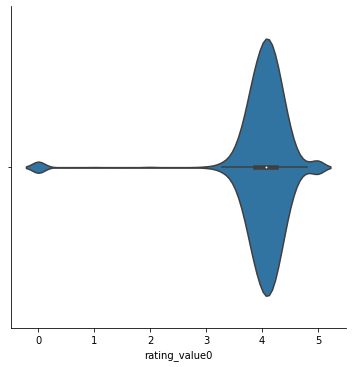

In [106]:
sns.catplot(data=df, x="rating_value0", kind="violin")

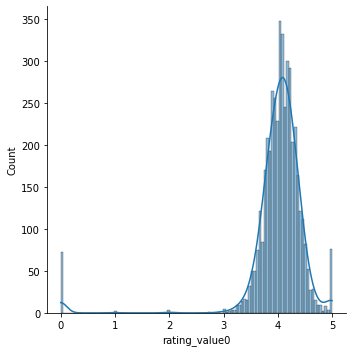

In [107]:
sns.displot(df, x="rating_value0", kde=True)

In [108]:
df[df["rating_value1"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
3973,Generation Manifestation,Steven Bereznai,TESTING DAY IS COMING.The Genetic Wars that tu...,2,0,248,2021,Jambor,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259144.15
2386,Ordinary Sun,Matthew Henriksen,Poetry. Henriksen opens ORDINARY SUN by insist...,2,0,108,2011,Black Ocean,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215833.15
2397,Destroyer and Preserver,Matthew Rohrer,"""Rohrer has an enchanting willingness to look ...",2,0,88,2011,Wave Books,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2804,Everything Is F*cked: A Book About Hope,Mark Manson,From the author of the international mega-best...,0,0,288,2013,No Publisher,3,5,...,0.259846,0.122008,0.094208,0.066795,0.040541,0.011969,0.010425,0.008880,0.007722,NaN
2801,Stay Sexy & Don't Get Murdered: The Definitive...,Karen Kilgariff,Sharing never-before-heard stories ranging fro...,0,0,304,2013,No Publisher,3,5,...,0.160591,0.154873,0.117941,0.053848,0.038599,0.031451,0.029783,0.029068,0.023588,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.157303,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.350000,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63


In [109]:
df["rating_value1"].describe()

count    1434.000000
mean        4.507671
std         0.280881
min         3.200000
25%         4.400000
50%         4.500000
75%         4.700000
max         5.000000
Name: rating_value1, dtype: float64

In [110]:
print("Rating_value1 Mean : {} , Rating_value1 Median : {}".format(df["rating_value1"].mean(), df["rating_value1"].median()))

Rating_value1 Mean : 4.507670850767084 , Rating_value1 Median : 4.5


In [111]:
df["rating_value1"] = df["rating_value1"].fillna(df["rating_value1"].median())
df["rating_value1"].isnull().sum()

0

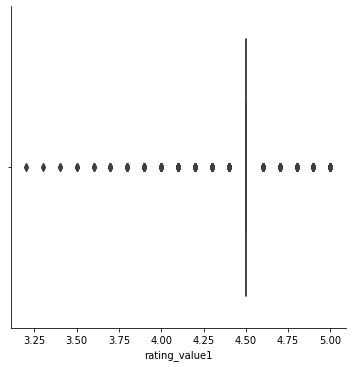

In [112]:
sns.catplot(data=df, x="rating_value1", kind="box")

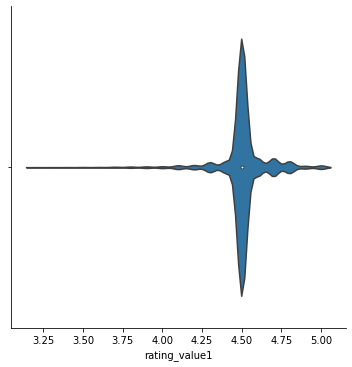

In [113]:
sns.catplot(data=df, x="rating_value1", kind="violin")

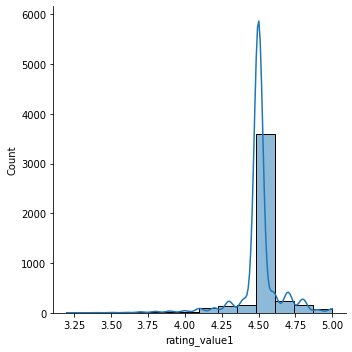

In [114]:
sns.displot(df, x="rating_value1", kde=True)

In [115]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight               0
rating_value0        0
rating_value1        0
rating_count0       10
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [116]:
rating_count0_tmp = df["rating_count0"][df[ "rating_count0"]!="1\n  rating"]
rating_count0_tmp = rating_count0_tmp.astype(float)

In [117]:
print("Rating_count0 Mean : {} , Rating_count0 Median : {}".format(rating_count0_tmp.mean(), rating_count0_tmp.median()))

Rating_count0 Mean : 58020.165590919205 , Rating_count0 Median : 13337.0


In [118]:
rating_count0_df = df["rating_count0"].copy()

for data in rating_count0_df:
  if operator.contains(str(data), "1\n  rating"):
    rating_count0_df[rating_count0_df==data] = str(rating_count0_tmp.median())

In [119]:
df["rating_count0"] = rating_count0_df.astype(float)
df["rating_count0"].unique

<bound method Series.unique of 2340      2361.0
4297    112307.0
351      48702.0
4130    655363.0
4296    104026.0
          ...   
3841        39.0
3993        30.0
3839         0.0
3979         2.0
3669        63.0
Name: rating_count0, Length: 4550, dtype: float64>

In [120]:
df["rating_count0"] = df["rating_count0"].fillna(df["rating_count0"].median())
df["rating_count0"].isnull().sum()

0

In [121]:
df["rating_count0"].describe()

count    4.550000e+03
mean     5.746040e+04
std      1.922201e+05
min      0.000000e+00
25%      3.645750e+03
50%      1.333700e+04
75%      4.321575e+04
max      3.803221e+06
Name: rating_count0, dtype: float64

In [122]:
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.199275,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.274044,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.254930,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.259322,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.225913,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

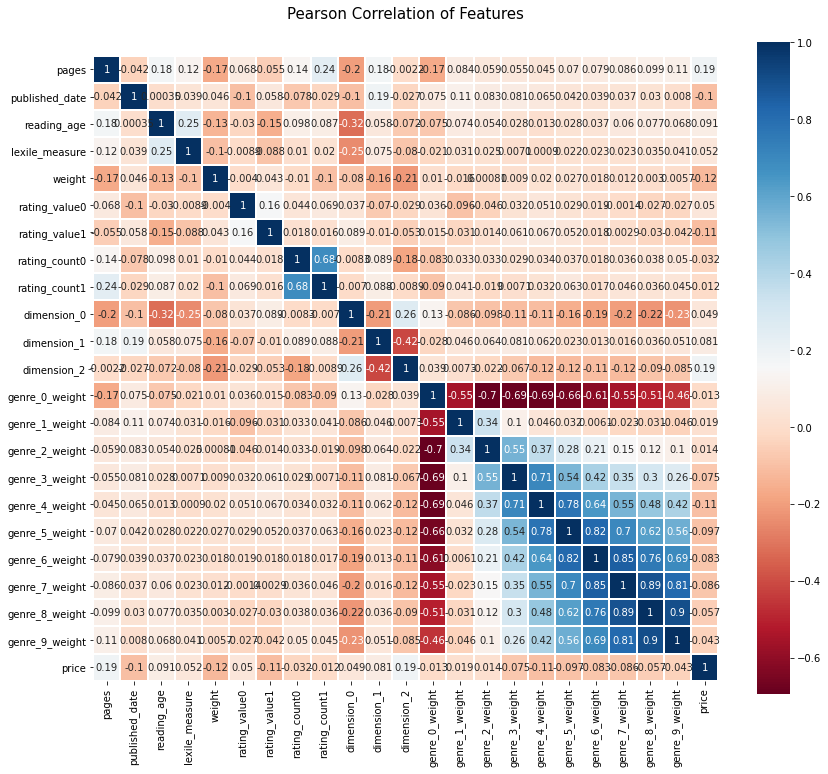

In [123]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

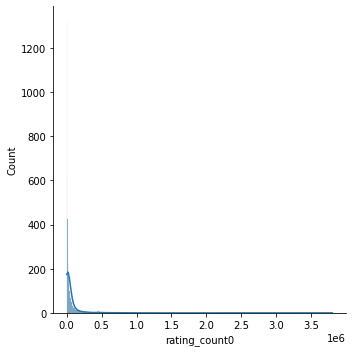

In [135]:
sns.displot(df, x="rating_count0", kde=True)

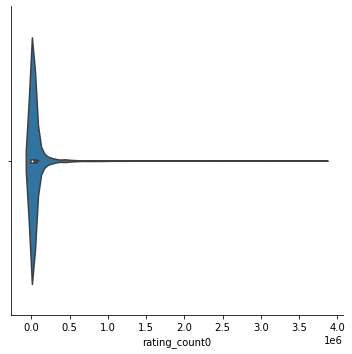

In [125]:
sns.catplot(data=df, x="rating_count0", kind="violin")

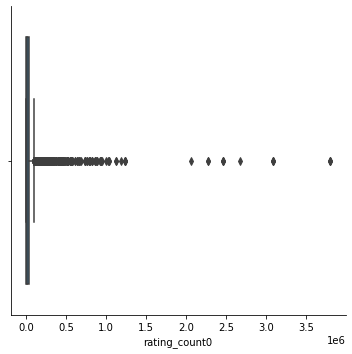

In [126]:
sns.catplot(data=df, x="rating_count0", kind="box")

In [127]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight               0
rating_value0        0
rating_value1        0
rating_count0        0
rating_count1     3116
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [128]:
df[df["rating_count1"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
3973,Generation Manifestation,Steven Bereznai,TESTING DAY IS COMING.The Genetic Wars that tu...,2,0,248,2021,Jambor,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259144.15
2386,Ordinary Sun,Matthew Henriksen,Poetry. Henriksen opens ORDINARY SUN by insist...,2,0,108,2011,Black Ocean,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215833.15
2397,Destroyer and Preserver,Matthew Rohrer,"""Rohrer has an enchanting willingness to look ...",2,0,88,2011,Wave Books,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2804,Everything Is F*cked: A Book About Hope,Mark Manson,From the author of the international mega-best...,0,0,288,2013,No Publisher,3,5,...,0.259846,0.122008,0.094208,0.066795,0.040541,0.011969,0.010425,0.008880,0.007722,NaN
2801,Stay Sexy & Don't Get Murdered: The Definitive...,Karen Kilgariff,Sharing never-before-heard stories ranging fro...,0,0,304,2013,No Publisher,3,5,...,0.160591,0.154873,0.117941,0.053848,0.038599,0.031451,0.029783,0.029068,0.023588,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.157303,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.350000,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63


In [129]:
df["rating_count1"].describe()

count     1434.000000
mean      2431.348675
std       5086.034157
min          1.000000
25%        257.250000
50%        782.500000
75%       2324.000000
max      55836.000000
Name: rating_count1, dtype: float64

In [130]:
df["rating_count1"].unique

<bound method Series.unique of 2340      667.0
4297      705.0
351       307.0
4130    20126.0
4296     1719.0
         ...   
3841        NaN
3993        NaN
3839        NaN
3979        NaN
3669        NaN
Name: rating_count1, Length: 4550, dtype: float64>

In [131]:
print("Rating_count1 Mean : {} , Rating_count1 Median : {}".format(df["rating_count1"].mean(), df["rating_count1"].median()))

Rating_count1 Mean : 2431.3486750348675 , Rating_count1 Median : 782.5


In [132]:
df["rating_count1"] = df["rating_count1"].fillna(df["rating_count1"].median())
df["rating_count1"].isnull().sum()

0

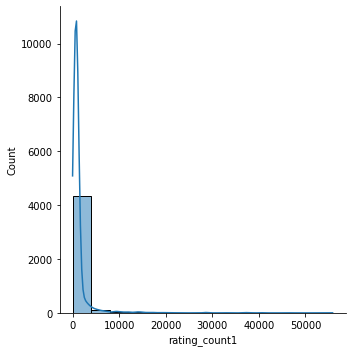

In [133]:
sns.displot(df, x="rating_count1", kde=True)

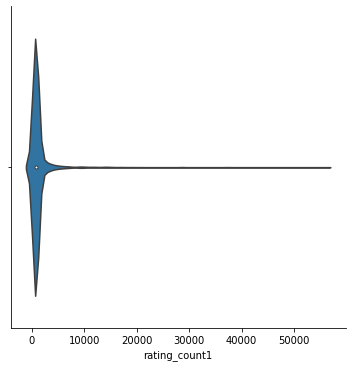

In [136]:
sns.catplot(data=df, x="rating_count1", kind="violin")

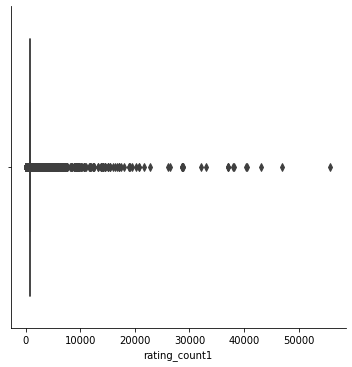

In [137]:
sns.catplot(data=df, x="rating_count1", kind="box")

In [138]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight               0
rating_value0        0
rating_value1        0
rating_count0        0
rating_count1        0
dimension_0       3177
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [139]:
df[df["dimension_0"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
1200,Steve Jobs,Walter Isaacson,"Walter Isaacson's ""enthralling"" (The New Yorke...",0,0,627,2011,Simon & Schuster,3,5,...,0.241993,0.125069,0.034718,0.029404,0.026574,0.021811,0.016842,0.014978,0.014426,129933.00
2396,Feasting at the Table of the Damned,Daniel Ames,"Poetry. With dark humor, spare language and a ...",2,0,96,2011,Aquarius Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Dead Reckoning,Charlaine Harris,An Alternate Cover for this ASIN can be found ...,1,0,336,2011,Gollancz,3,5,...,0.174821,0.140723,0.112145,0.087681,0.079996,0.063975,0.060619,0.053800,0.025655,NaN
9,Dead Reckoning,Charlaine Harris,An Alternate Cover for this ASIN can be found ...,1,0,336,2011,Gollancz,3,5,...,0.174821,0.140723,0.112145,0.087681,0.079996,0.063975,0.060619,0.053800,0.025655,NaN
4103,Love Unrehearsed,Tina Reber,There is no rehearsal for true love.When A-lis...,1,0,448,2012,Atria Books,3,5,...,0.133921,0.125100,0.103448,0.063352,0.045710,0.032879,0.024058,0.019246,0.016038,28729.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,The Seven Pillars of Customer Success: A Prove...,Wayne McCulloch,"As a customer success leader, whose insight do...",1,0,334,2021,Lioncrest Publishing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144225.63
3986,Steal the Demon,Robert Roth,As an ace pilot (and occasional smuggler) at h...,1,0,334,2021,Jetspace Studio,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63
3988,Scarred,Eva Winners,SERIES BLURBWhen powers clash between the powe...,1,0,367,2021,Winners Publishing LLC,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63
3845,Runaway Train,Lee Matthew Goldberg,They told me I was an out-of-control train abo...,1,0,334,2021,Wise Wolf Books,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72040.63


In [140]:
df["dimension_0"].unique

<bound method Series.unique of 2340    28.2702
4297    15.2400
351     14.9352
4130    16.5100
4296    14.9352
         ...   
3841    15.2400
3993    15.8750
3839    13.6652
3979        NaN
3669    15.5702
Name: dimension_0, Length: 4550, dtype: float64>

In [141]:
df["dimension_0"].describe()

count    1373.000000
mean       15.425847
std         3.186874
min         0.939800
25%        13.970000
50%        15.240000
75%        16.332200
max        30.480000
Name: dimension_0, dtype: float64

In [142]:
print("Dimension_0 Mean : {} , Dimension_0 Median : {}".format(df["dimension_0"].mean(), df["dimension_0"].median()))

Dimension_0 Mean : 15.425847341587763 , Dimension_0 Median : 15.24


In [143]:
df["dimension_0"] = df["dimension_0"].fillna(df["dimension_0"].median())
df["dimension_0"].isnull().sum()

0

In [144]:
df["dimension_0"].unique

<bound method Series.unique of 2340    28.2702
4297    15.2400
351     14.9352
4130    16.5100
4296    14.9352
         ...   
3841    15.2400
3993    15.8750
3839    13.6652
3979    15.2400
3669    15.5702
Name: dimension_0, Length: 4550, dtype: float64>

In [145]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight               0
rating_value0        0
rating_value1        0
rating_count0        0
rating_count1        0
dimension_0          0
dimension_1       3177
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [146]:
df[df["dimension_1"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
1200,Steve Jobs,Walter Isaacson,"Walter Isaacson's ""enthralling"" (The New Yorke...",0,0,627,2011,Simon & Schuster,3,5,...,0.241993,0.125069,0.034718,0.029404,0.026574,0.021811,0.016842,0.014978,0.014426,129933.00
2396,Feasting at the Table of the Damned,Daniel Ames,"Poetry. With dark humor, spare language and a ...",2,0,96,2011,Aquarius Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Dead Reckoning,Charlaine Harris,An Alternate Cover for this ASIN can be found ...,1,0,336,2011,Gollancz,3,5,...,0.174821,0.140723,0.112145,0.087681,0.079996,0.063975,0.060619,0.053800,0.025655,NaN
9,Dead Reckoning,Charlaine Harris,An Alternate Cover for this ASIN can be found ...,1,0,336,2011,Gollancz,3,5,...,0.174821,0.140723,0.112145,0.087681,0.079996,0.063975,0.060619,0.053800,0.025655,NaN
4103,Love Unrehearsed,Tina Reber,There is no rehearsal for true love.When A-lis...,1,0,448,2012,Atria Books,3,5,...,0.133921,0.125100,0.103448,0.063352,0.045710,0.032879,0.024058,0.019246,0.016038,28729.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,The Seven Pillars of Customer Success: A Prove...,Wayne McCulloch,"As a customer success leader, whose insight do...",1,0,334,2021,Lioncrest Publishing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144225.63
3986,Steal the Demon,Robert Roth,As an ace pilot (and occasional smuggler) at h...,1,0,334,2021,Jetspace Studio,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63
3988,Scarred,Eva Winners,SERIES BLURBWhen powers clash between the powe...,1,0,367,2021,Winners Publishing LLC,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63
3845,Runaway Train,Lee Matthew Goldberg,They told me I was an out-of-control train abo...,1,0,334,2021,Wise Wolf Books,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72040.63


In [147]:
df["dimension_1"].unique

<bound method Series.unique of 2340     0.8890
4297     2.5400
351      4.1402
4130     3.0480
4296     3.1750
         ...   
3841     2.9718
3993     2.0574
3839    20.9550
3979        NaN
3669     2.3114
Name: dimension_1, Length: 4550, dtype: float64>

In [148]:
df["dimension_1"].describe()

count    1373.000000
mean        3.914504
std         4.362305
min         0.025400
25%         2.260600
50%         2.921000
75%         3.581400
max        27.432000
Name: dimension_1, dtype: float64

In [149]:
print("Dimension_1 Mean : {} , Dimension_1 Median : {}".format(df["dimension_1"].mean(), df["dimension_1"].median()))

Dimension_1 Mean : 3.9145044428259292 , Dimension_1 Median : 2.9210000000000003


In [150]:
df["dimension_1"] = df["dimension_1"].fillna(df["dimension_1"].median())
df["dimension_1"].isnull().sum()

0

In [151]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight               0
rating_value0        0
rating_value1        0
rating_count0        0
rating_count1        0
dimension_0          0
dimension_1          0
dimension_2       3226
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

In [152]:
df[df["dimension_2"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
1200,Steve Jobs,Walter Isaacson,"Walter Isaacson's ""enthralling"" (The New Yorke...",0,0,627,2011,Simon & Schuster,3,5,...,0.241993,0.125069,0.034718,0.029404,0.026574,0.021811,0.016842,0.014978,0.014426,129933.00
343,United We Spy,Ally Carter,Cammie Morgan has lost her father and her memo...,0,0,296,2013,Hyperion Book CH,3,5,...,0.127791,0.112114,0.097387,0.088361,0.069359,0.059382,0.035154,0.033254,0.030879,216555.00
4293,"Out of Sight, Out of Time",Ally Carter,With more than a million Gallagher Girls books...,0,0,294,2012,Hyperion Book CH,3,5,...,0.136143,0.104439,0.093249,0.080567,0.067512,0.063409,0.038791,0.037673,0.036554,112608.60
2313,Demonglass,Rachel Hawkins,Sophie Mercer thought she was a witch. That wa...,0,0,359,2011,Hyperion Book CH,3,5,...,0.209312,0.145847,0.080773,0.077955,0.068697,0.056219,0.046156,0.045351,0.040521,237777.39
3414,Demonglass,Rachel Hawkins,Sophie Mercer thought she was a witch. That wa...,0,0,359,2011,Hyperion Book CH,3,5,...,0.209312,0.145847,0.080773,0.077955,0.068697,0.056219,0.046156,0.045351,0.040521,237777.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,Scarred,Eva Winners,SERIES BLURBWhen powers clash between the powe...,1,0,367,2021,Winners Publishing LLC,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43166.63
3845,Runaway Train,Lee Matthew Goldberg,They told me I was an out-of-control train abo...,1,0,334,2021,Wise Wolf Books,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72040.63
3992,Nonbinary: A Memoir,Genesis P-Orridge,A revealing and beautifully open memoir from p...,0,0,352,2021,Abrams Press,3,5,...,0.222222,0.222222,0.222222,NaN,NaN,NaN,NaN,NaN,NaN,375362.00
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13


In [153]:
df["dimension_2"].unique

<bound method Series.unique of 2340    25.6032
4297    22.2250
351     21.9202
4130    24.1300
4296    21.9202
         ...   
3841    22.8600
3993    22.8600
3839        NaN
3979        NaN
3669    23.4950
Name: dimension_2, Length: 4550, dtype: float64>

In [154]:
df["dimension_2"].describe()

count    1324.000000
mean       22.217556
std         3.173109
min         0.787400
25%        20.955000
50%        22.860000
75%        24.130000
max        42.418000
Name: dimension_2, dtype: float64

In [155]:
print("Dimension_2 Mean : {} , Dimension_2 Median : {}".format(df["dimension_2"].mean(), df["dimension_2"].median()))

Dimension_2 Mean : 22.217556495468276 , Dimension_2 Median : 22.86


In [156]:
df["dimension_2"] = df["dimension_2"].fillna(df["dimension_2"].median())
df["dimension_2"].isnull().sum()

0

In [157]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight               0
rating_value0        0
rating_value1        0
rating_count0        0
rating_count1        0
dimension_0          0
dimension_1          0
dimension_2          0
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
dtype: int64

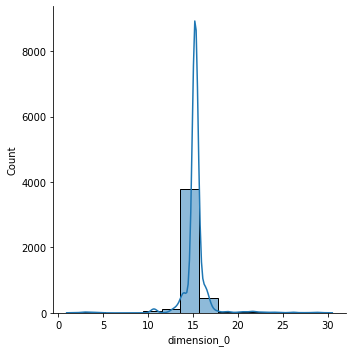

In [158]:
sns.displot(df, x="dimension_0", kde=True)

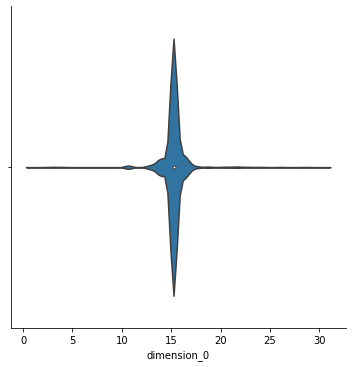

In [159]:
sns.catplot(data=df, x="dimension_0", kind="violin")

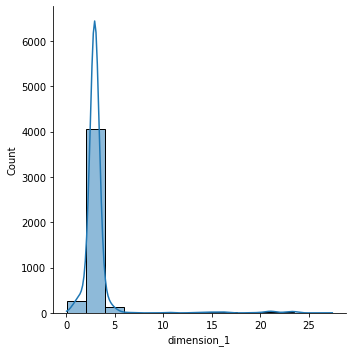

In [160]:
sns.displot(df, x="dimension_1", kde=True)

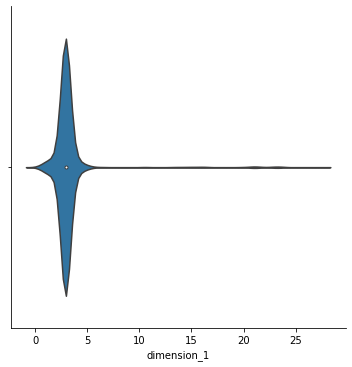

In [161]:
sns.catplot(data=df, x="dimension_1", kind="violin")

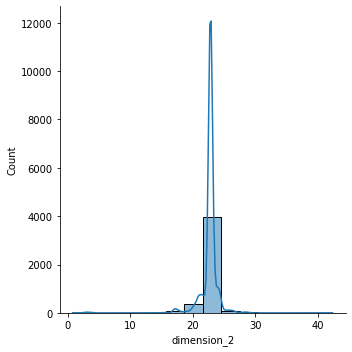

In [162]:
sns.displot(df, x="dimension_2", kde=True)

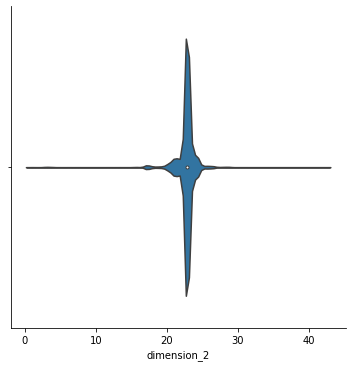

In [164]:
sns.catplot(data=df, x="dimension_2", kind="violin")

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550 entries, 2340 to 3669
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4550 non-null   object 
 1   author          4550 non-null   object 
 2   description     4550 non-null   object 
 3   bookformat      4550 non-null   object 
 4   bookedition     4550 non-null   object 
 5   pages           4550 non-null   int32  
 6   published_date  4550 non-null   int32  
 7   publisher       4550 non-null   object 
 8   reading_age     4550 non-null   int32  
 9   lexile_measure  4550 non-null   int32  
 10  weight          4550 non-null   float64
 11  rating_value0   4550 non-null   float64
 12  rating_value1   4550 non-null   float64
 13  rating_count0   4550 non-null   float64
 14  rating_count1   4550 non-null   float64
 15  dimension_0     4550 non-null   float64
 16  dimension_1     4550 non-null   float64
 17  dimension_2     4550 non-null 

In [167]:
volume = []
v0 = df["dimension_0"].copy()
v1 = df["dimension_1"].copy()
v2 = df["dimension_2"].copy()
volume = v0*v1*v2
volume

2340     643.464943
4297     860.320860
351     1355.429321
4130    1214.281442
4296    1039.439663
           ...     
3841    1035.334704
3993     746.635604
3839    6546.058521
3979    1017.636674
3669     845.560622
Length: 4550, dtype: float64

In [168]:
df["volume"] = volume
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663


In [169]:
df["volume"].describe()

count    4550.000000
mean     1079.273863
std       699.401829
min         8.849015
25%      1017.636674
50%      1017.636674
75%      1017.636674
max      8362.687468
Name: volume, dtype: float64

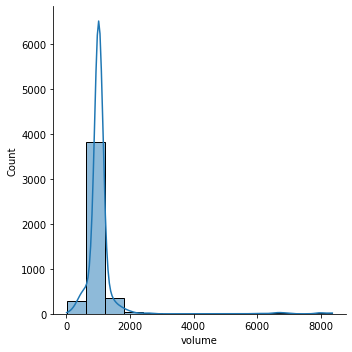

In [170]:
sns.displot(df, x="volume", kde=True)

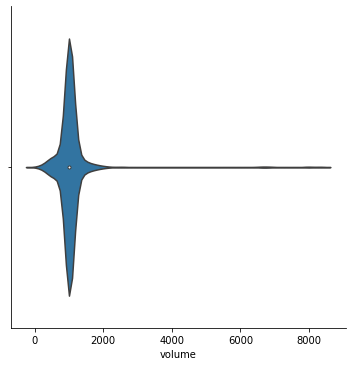

In [171]:
sns.catplot(data=df, x="volume", kind="violin")

In [173]:
df.shape

(4550, 40)

In [174]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight               0
rating_value0        0
rating_value1        0
rating_count0        0
rating_count1        0
dimension_0          0
dimension_1          0
dimension_2          0
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
volume               0
dtype: int64

In [175]:
df = df.drop(["dimension_0","dimension_1","dimension_2"], axis=1)
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

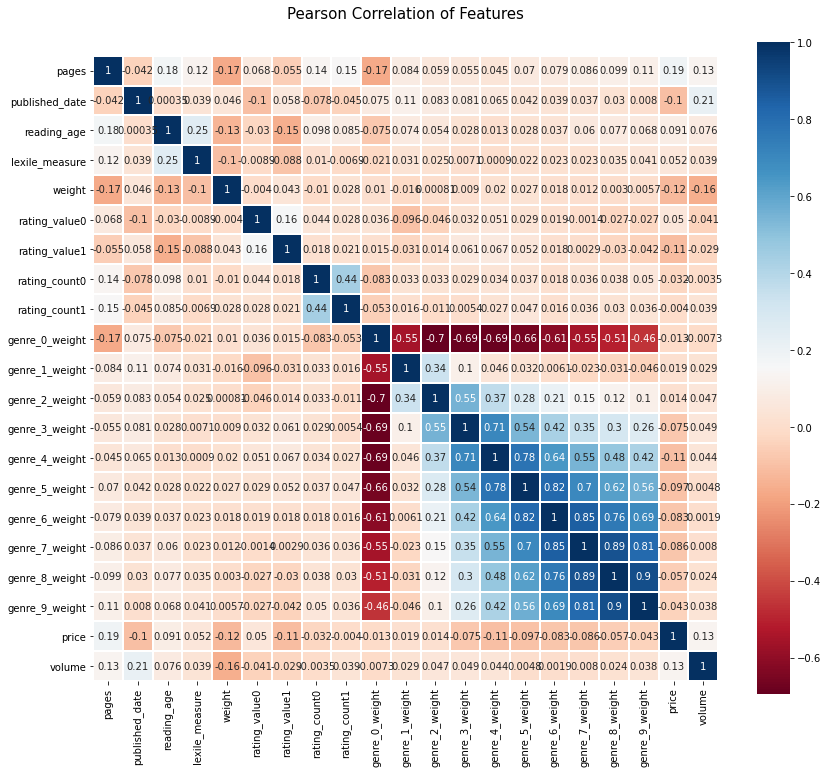

In [176]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [177]:
df.isnull().sum()

title                0
author               0
description          0
bookformat           0
bookedition          0
pages                0
published_date       0
publisher            0
reading_age          0
lexile_measure       0
weight               0
rating_value0        0
rating_value1        0
rating_count0        0
rating_count1        0
genre_0            231
genre_1            297
genre_2            346
genre_3            380
genre_4            429
genre_5            472
genre_6            507
genre_7            554
genre_8            595
genre_9            640
genre_0_weight     231
genre_1_weight     297
genre_2_weight     346
genre_3_weight     380
genre_4_weight     429
genre_5_weight     472
genre_6_weight     507
genre_7_weight     554
genre_8_weight     595
genre_9_weight     640
price             3007
volume               0
dtype: int64

In [178]:
df[df["price"].isna()]

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
4185,The Signal and the Noise: Why So Many Predicti...,Nate Silver,One of Wall Street Journal's Best Ten Works of...,0,0,534,2012,Penguin Press,3,5,...,0.109620,0.092152,0.068861,0.048101,0.043797,0.014937,0.014684,0.013924,NaN,1180.088932
387,Fyre,Angie Sage,The seventh book in the internationally bestse...,0,0,720,2013,Katherine Tegen Books,2,5,...,0.083195,0.062396,0.059900,0.045757,0.037438,0.031614,0.025790,0.016639,NaN,1329.871859
4367,Dragons Love Tacos,Adam Rubin,This scrumptious New York Times bestseller has...,0,0,32,2012,Dial Books,1,5,...,0.081845,0.077275,0.055256,0.049439,0.040299,0.036145,0.014956,0.008309,NaN,574.820728
2366,"The Dark-Hunters, Vol. 4",Joshua Hale Fialkov,"In the war against vampires, mankind has only ...",2,0,208,2011,St. Martin's Griffin,3,5,...,0.089431,0.089431,0.085366,0.060976,0.060976,0.052846,0.044715,0.028455,NaN,314.631629
2380,Horoscopes for the Dead,Billy Collins,Billy Collins is widely acknowledged as a prom...,0,0,103,2011,Random House,3,5,...,0.010989,0.010989,0.007326,0.004884,0.004884,0.003663,0.003663,0.003663,NaN,586.791134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,Troy: The Greek Myths Reimagined,Stephen Fry,In this brilliant conclusion to his bestsellin...,0,0,288,2021,Chronicle Books,3,5,...,0.123159,0.101740,0.082999,0.062918,0.060241,0.040161,0.018742,0.013387,NaN,1017.636674
3645,The Sentinel: A Jack Reacher Novel,Lee Child,No Description,2,0,334,2021,Dell,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570.491380
3832,Notes on Grief,Chimamanda Ngozi Adichie,Notes on Grief is an exquisite work of meditat...,0,0,80,2021,Knopf,3,5,...,0.083333,0.050000,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,NaN,278.807967
3812,Luster,Raven Leilani,No one wants what no one wants.And how do we e...,2,0,240,2021,Picador,3,5,...,0.092652,0.070744,0.043359,0.040621,0.036969,0.034231,0.028754,0.024190,NaN,1017.636674


In [179]:
df["price"].describe()

count    1.543000e+03
mean     2.420531e+05
std      1.568855e+05
min      0.000000e+00
25%      1.359244e+05
50%      2.164106e+05
75%      2.958863e+05
max      2.118341e+06
Name: price, dtype: float64

In [180]:
print("Price Mean : {} , Price Median : {}".format(df["price"].mean(), df["price"].median()))

Price Mean : 242053.0998250162 , Price Median : 216410.63


In [181]:
df["price"] = df["price"].fillna(df["price"].median())
df["price"].isnull().sum()

0

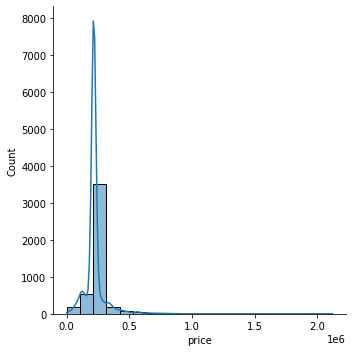

In [182]:
sns.displot(df, x="price", bins=20, kde=True)

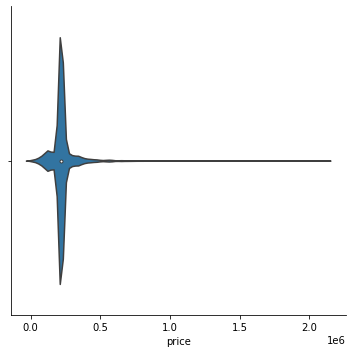

In [183]:
sns.catplot(data=df, x="price", kind="violin")

In [184]:
df.isnull().sum()

title               0
author              0
description         0
bookformat          0
bookedition         0
pages               0
published_date      0
publisher           0
reading_age         0
lexile_measure      0
weight              0
rating_value0       0
rating_value1       0
rating_count0       0
rating_count1       0
genre_0           231
genre_1           297
genre_2           346
genre_3           380
genre_4           429
genre_5           472
genre_6           507
genre_7           554
genre_8           595
genre_9           640
genre_0_weight    231
genre_1_weight    297
genre_2_weight    346
genre_3_weight    380
genre_4_weight    429
genre_5_weight    472
genre_6_weight    507
genre_7_weight    554
genre_8_weight    595
genre_9_weight    640
price               0
volume              0
dtype: int64

In [186]:
genre_df = df[["genre_0","genre_1","genre_2","genre_3","genre_4","genre_5","genre_6","genre_7","genre_8","genre_9"]]
genre_df

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
2340,Picture Books,Childrens,Humor,Fiction,Poetry,Storytime,School,Realistic Fiction,Audiobook,Kids
4297,Young Adult,Romance,Contemporary,Fiction,Realistic Fiction,Chick Lit,Young Adult Contemporary,Young Adult Romance,Teen,Contemporary Romance
351,Young Adult,Romance,Contemporary,Realistic Fiction,Fiction,Chick Lit,Young Adult Contemporary,Young Adult Romance,Teen,Contemporary Romance
4130,Nonfiction,Memoir,Travel,Biography,Adventure,Audiobook,Biography Memoir,Autobiography,Nature,Book Club
4296,Historical Fiction,Young Adult,Fiction,Historical,War,World War II,Audiobook,Teen,Mystery,Adventure
...,...,...,...,...,...,...,...,...,...,...
3841,Fiction,Thriller,Mystery Thriller,Contemporary,Mystery,Adult Fiction,Adult,Feminism,Literary Fiction,Audiobook
3993,Comics,Graphic Novels,Science Fiction,Graphic Novels Comics,NaN,NaN,NaN,NaN,NaN,NaN
3839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
genre_df.dropna(subset=["genre_0","genre_1","genre_2","genre_3","genre_4","genre_5","genre_6","genre_7","genre_8","genre_9"], inplace=True)

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
genre_df.describe()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
count,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
unique,75,121,198,241,279,307,314,341,368,379
top,Nonfiction,Fiction,Fiction,Fiction,Audiobook,Audiobook,Audiobook,Adult,Audiobook,Adult
freq,629,632,404,334,324,407,389,320,306,261


In [189]:
df["genre_0"] = df["genre_0"].fillna("Nonfiction")
df["genre_1"] = df["genre_1"].fillna("Fiction")
df["genre_2"] = df["genre_2"].fillna("Fiction")
df["genre_3"] = df["genre_3"].fillna("Fiction")
df["genre_4"] = df["genre_4"].fillna("Audiobook")
df["genre_5"] = df["genre_5"].fillna("Audiobook")
df["genre_6"] = df["genre_6"].fillna("Audiobook")
df["genre_7"] = df["genre_7"].fillna("Adult")
df["genre_8"] = df["genre_8"].fillna("Audiobook")
df["genre_9"] = df["genre_9"].fillna("Adult")

df.isnull().sum()

title               0
author              0
description         0
bookformat          0
bookedition         0
pages               0
published_date      0
publisher           0
reading_age         0
lexile_measure      0
weight              0
rating_value0       0
rating_value1       0
rating_count0       0
rating_count1       0
genre_0             0
genre_1             0
genre_2             0
genre_3             0
genre_4             0
genre_5             0
genre_6             0
genre_7             0
genre_8             0
genre_9             0
genre_0_weight    231
genre_1_weight    297
genre_2_weight    346
genre_3_weight    380
genre_4_weight    429
genre_5_weight    472
genre_6_weight    507
genre_7_weight    554
genre_8_weight    595
genre_9_weight    640
price               0
volume              0
dtype: int64

In [190]:
genre0 = df["genre_0"].unique()
num0 = list(range(len(genre0)))
genre0_mapping = dict(zip(genre0, num0))
df["genre_0"] = df["genre_0"].map(genre0_mapping).astype(int)

df["genre_0"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85])

In [191]:
df["Genre0Range"] = pd.cut(df['genre_0'], 6)
df[["Genre0Range", "price"]].groupby(["Genre0Range"], as_index=False).mean().sort_values(by="Genre0Range", ascending=True)

,Genre0Range,price
0,"(-0.085, 14.167]",220557.665913
1,"(14.167, 28.333]",236495.453976
2,"(28.333, 42.5]",231258.472134
3,"(42.5, 56.667]",227029.614748
4,"(56.667, 70.833]",192400.524048
5,"(70.833, 85.0]",222876.886316


In [192]:
df = df.drop(["Genre0Range"], axis=1)

In [193]:
df.loc[df["genre_0"] <= 14.167, "genre_0"] = 0
df.loc[(df["genre_0"] > 14.167) & (df["genre_0"] <= 28.333), "genre_0"] = 1
df.loc[(df["genre_0"] > 28.333) & (df["genre_0"] <= 42.5), "genre_0"] = 2
df.loc[(df["genre_0"] > 42.5) & (df["genre_0"] <= 56.667), "genre_0"] = 3
df.loc[(df["genre_0"] > 56.667) & (df["genre_0"] <= 70.833), "genre_0"] = 4
df.loc[df["genre_0"] > 70.833, "genre_0"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


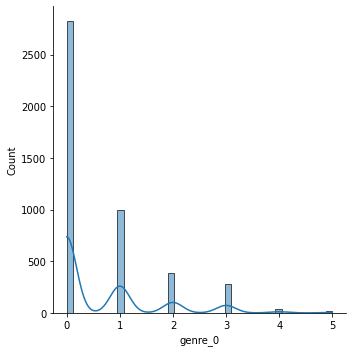

In [194]:
sns.displot(df, x="genre_0", kde=True)

In [195]:
genre1 = df["genre_1"].unique()
num1 = list(range(len(genre1)))
genre1_mapping = dict(zip(genre1, num1))
df["genre_1"] = df["genre_1"].map(genre1_mapping).astype(int)

df["genre_1"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137])

In [196]:
df["Genre1Range"] = pd.cut(df['genre_1'], 6)
df[["Genre1Range", "price"]].groupby(["Genre1Range"], as_index=False).mean().sort_values(by="Genre1Range", ascending=True)

,Genre1Range,price
0,"(-0.137, 22.833]",224955.685039
1,"(22.833, 45.667]",224236.987854
2,"(45.667, 68.5]",227332.803813
3,"(68.5, 91.333]",228725.869953
4,"(91.333, 114.167]",217959.513857
5,"(114.167, 137.0]",217994.042903


In [197]:
df = df.drop(["Genre1Range"], axis=1)

In [198]:
df.loc[df["genre_1"] <= 22.833, "genre_1"] = 0
df.loc[(df["genre_1"] > 22.833) & (df["genre_1"] <= 45.667), "genre_1"] = 1
df.loc[(df["genre_1"] > 45.667) & (df["genre_1"] <= 68.5), "genre_1"] = 2
df.loc[(df["genre_1"] > 68.5) & (df["genre_1"] <= 91.333), "genre_1"] = 3
df.loc[(df["genre_1"] > 91.333) & (df["genre_1"] <= 114.167), "genre_1"] = 4
df.loc[df["genre_1"] > 114.167, "genre_1"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


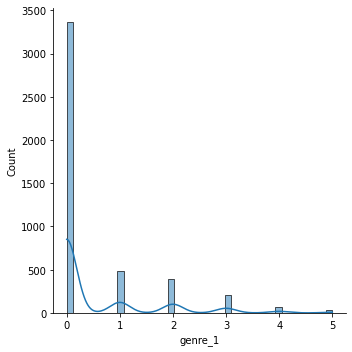

In [199]:
sns.displot(df, x="genre_1", kde=True)

In [200]:
genre2 = df["genre_2"].unique()
num2 = list(range(len(genre2)))
genre2_mapping = dict(zip(genre2, num2))
df["genre_2"] = df["genre_2"].map(genre2_mapping).astype(int)

df["genre_2"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [201]:
df["Genre2Range"] = pd.cut(df['genre_2'], 6)
df[["Genre2Range", "price"]].groupby(["Genre2Range"], as_index=False).mean().sort_values(by="Genre2Range", ascending=True)

,Genre2Range,price
0,"(-0.216, 36.0]",223773.117942
1,"(36.0, 72.0]",227172.695071
2,"(72.0, 108.0]",230341.922514
3,"(108.0, 144.0]",228843.200110
4,"(144.0, 180.0]",217062.516077
5,"(180.0, 216.0]",231034.315345


In [202]:
df = df.drop(["Genre2Range"], axis=1)

In [203]:
df.loc[df["genre_2"] <= 36.0, "genre_2"] = 0
df.loc[(df["genre_2"] > 36.0) & (df["genre_2"] <= 72.0), "genre_2"] = 1
df.loc[(df["genre_2"] > 72.0) & (df["genre_2"] <= 108.0), "genre_2"] = 2
df.loc[(df["genre_2"] > 108.0) & (df["genre_2"] <= 144.0), "genre_2"] = 3
df.loc[(df["genre_2"] > 144.0) & (df["genre_2"] <= 180.0), "genre_2"] = 4
df.loc[df["genre_2"] > 180.0, "genre_2"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


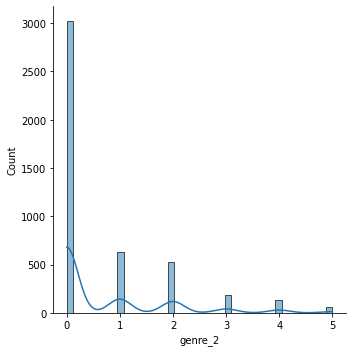

In [204]:
sns.displot(df, x="genre_2", kde=True)

In [205]:
genre3 = df["genre_3"].unique()
num3 = list(range(len(genre3)))
genre3_mapping = dict(zip(genre3, num3))
df["genre_3"] = df["genre_3"].map(genre3_mapping).astype(int)

df["genre_3"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [206]:
df["Genre3Range"] = pd.cut(df['genre_3'], 6)
df[["Genre3Range", "price"]].groupby(["Genre3Range"], as_index=False).mean().sort_values(by="Genre3Range", ascending=True)

,Genre3Range,price
0,"(-0.251, 41.833]",221520.268056
1,"(41.833, 83.667]",233320.740512
2,"(83.667, 125.5]",238191.849330
3,"(125.5, 167.333]",225697.961536
4,"(167.333, 209.167]",232329.510496
5,"(209.167, 251.0]",213423.975625


In [207]:
df = df.drop(["Genre3Range"], axis=1)

In [208]:
df.loc[df["genre_3"] <= 41.833, "genre_3"] = 0
df.loc[(df["genre_3"] > 41.833) & (df["genre_3"] <= 83.667), "genre_3"] = 1
df.loc[(df["genre_3"] > 83.667) & (df["genre_3"] <= 125.5), "genre_3"] = 2
df.loc[(df["genre_3"] > 125.5) & (df["genre_3"] <= 167.333), "genre_3"] = 3
df.loc[(df["genre_3"] > 167.333) & (df["genre_3"] <= 209.167), "genre_3"] = 4
df.loc[df["genre_3"] > 209.167, "genre_3"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


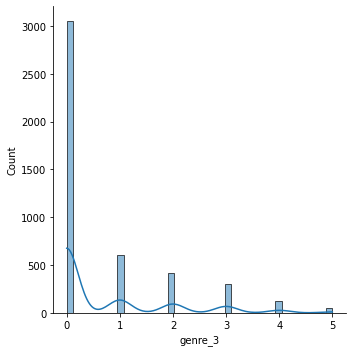

In [209]:
sns.displot(df, x="genre_3", kde=True)

In [210]:
genre4 = df["genre_4"].unique()
num4 = list(range(len(genre4)))
genre4_mapping = dict(zip(genre4, num4))
df["genre_4"] = df["genre_4"].map(genre4_mapping).astype(int)

df["genre_4"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [211]:
df["Genre4Range"] = pd.cut(df['genre_4'], 6)
df[["Genre4Range", "price"]].groupby(["Genre4Range"], as_index=False).mean().sort_values(by="Genre4Range", ascending=True)

,Genre4Range,price
0,"(-0.288, 48.0]",220612.381472
1,"(48.0, 96.0]",232376.751482
2,"(96.0, 144.0]",242018.578557
3,"(144.0, 192.0]",226521.410113
4,"(192.0, 240.0]",212203.140915
5,"(240.0, 288.0]",222837.282424


In [212]:
df = df.drop(["Genre4Range"], axis=1)

In [213]:
df.loc[df["genre_4"] <= 48.0, "genre_4"] = 0
df.loc[(df["genre_4"] > 48.0) & (df["genre_4"] <= 96.0), "genre_4"] = 1
df.loc[(df["genre_4"] > 96.0) & (df["genre_4"] <= 144.0), "genre_4"] = 2
df.loc[(df["genre_4"] > 144.0) & (df["genre_4"] <= 192.0), "genre_4"] = 3
df.loc[(df["genre_4"] > 192.0) & (df["genre_4"] <= 240.0), "genre_4"] = 4
df.loc[df["genre_4"] > 240.0, "genre_4"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


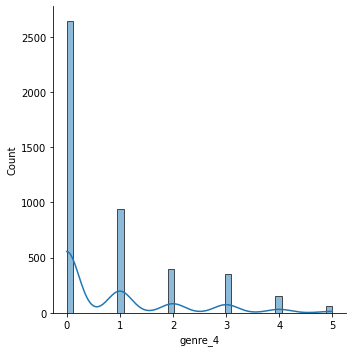

In [214]:
sns.displot(df, x="genre_4", kde=True)

In [215]:
genre5 = df["genre_5"].unique()
num5 = list(range(len(genre5)))
genre5_mapping = dict(zip(genre5, num5))
df["genre_5"] = df["genre_5"].map(genre5_mapping).astype(int)

df["genre_5"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [216]:
df["Genre5Range"] = pd.cut(df['genre_5'], 6)
df[["Genre5Range", "price"]].groupby(["Genre5Range"], as_index=False).mean().sort_values(by="Genre5Range", ascending=True)

,Genre5Range,price
0,"(-0.315, 52.5]",221428.210847
1,"(52.5, 105.0]",237103.032897
2,"(105.0, 157.5]",228855.956277
3,"(157.5, 210.0]",232825.960457
4,"(210.0, 262.5]",216625.506279
5,"(262.5, 315.0]",221712.766575


In [217]:
df = df.drop(["Genre5Range"], axis=1)

In [218]:
df.loc[df["genre_5"] <= 52.5, "genre_5"] = 0
df.loc[(df["genre_5"] > 52.5) & (df["genre_5"] <= 105.0), "genre_5"] = 1
df.loc[(df["genre_5"] > 105.0) & (df["genre_5"] <= 157.5), "genre_5"] = 2
df.loc[(df["genre_5"] > 157.5) & (df["genre_5"] <= 210.0), "genre_5"] = 3
df.loc[(df["genre_5"] > 210.0) & (df["genre_5"] <= 262.5), "genre_5"] = 4
df.loc[df["genre_5"] > 262.5, "genre_5"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


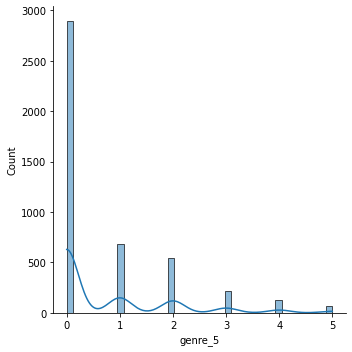

In [219]:
sns.displot(df, x="genre_5", kde=True)

In [220]:
genre6 = df["genre_6"].unique()
num6 = list(range(len(genre6)))
genre6_mapping = dict(zip(genre6, num6))
df["genre_6"] = df["genre_6"].map(genre6_mapping).astype(int)

df["genre_6"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [221]:
df["Genre6Range"] = pd.cut(df['genre_6'], 6)
df[["Genre6Range", "price"]].groupby(["Genre6Range"], as_index=False).mean().sort_values(by="Genre6Range", ascending=True)

,Genre6Range,price
0,"(-0.32, 53.333]",222039.314497
1,"(53.333, 106.667]",230134.943965
2,"(106.667, 160.0]",237970.415083
3,"(160.0, 213.333]",224286.579657
4,"(213.333, 266.667]",218349.941646
5,"(266.667, 320.0]",223105.590440


In [222]:
df = df.drop(["Genre6Range"], axis=1)

In [223]:
df.loc[df["genre_6"] <= 53.333, "genre_6"] = 0
df.loc[(df["genre_6"] > 53.333) & (df["genre_6"] <= 106.667), "genre_6"] = 1
df.loc[(df["genre_6"] > 106.667) & (df["genre_6"] <= 160.0), "genre_6"] = 2
df.loc[(df["genre_6"] > 160.0) & (df["genre_6"] <= 213.333), "genre_6"] = 3
df.loc[(df["genre_6"] > 213.333) & (df["genre_6"] <= 266.667), "genre_6"] = 4
df.loc[df["genre_6"] > 266.667, "genre_6"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


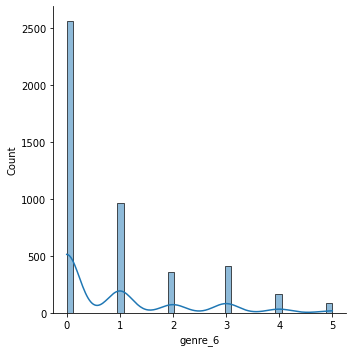

In [224]:
sns.displot(df, x="genre_6", kde=True)

In [225]:
genre7 = df["genre_7"].unique()
num7 = list(range(len(genre7)))
genre7_mapping = dict(zip(genre7, num7))
df["genre_7"] = df["genre_7"].map(genre7_mapping).astype(int)

df["genre_7"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [226]:
df["Genre7Range"] = pd.cut(df['genre_7'], 6)
df[["Genre7Range", "price"]].groupby(["Genre7Range"], as_index=False).mean().sort_values(by="Genre7Range", ascending=True)

,Genre7Range,price
0,"(-0.348, 58.0]",221963.256412
1,"(58.0, 116.0]",228347.287255
2,"(116.0, 174.0]",242730.335592
3,"(174.0, 232.0]",224272.008376
4,"(232.0, 290.0]",220038.327278
5,"(290.0, 348.0]",237513.001566


In [227]:
df = df.drop(["Genre7Range"], axis=1)

In [228]:
df.loc[df["genre_7"] <= 58.0, "genre_7"] = 0
df.loc[(df["genre_7"] > 58.0) & (df["genre_7"] <= 116.0), "genre_7"] = 1
df.loc[(df["genre_7"] > 116.0) & (df["genre_7"] <= 174.0), "genre_7"] = 2
df.loc[(df["genre_7"] > 174.0) & (df["genre_7"] <= 232.0), "genre_7"] = 3
df.loc[(df["genre_7"] > 232.0) & (df["genre_7"] <= 290.0), "genre_7"] = 4
df.loc[df["genre_7"] > 290.0, "genre_7"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


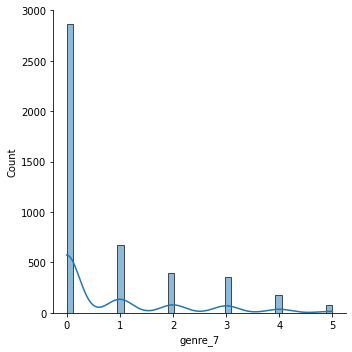

In [229]:
sns.displot(df, x="genre_7", kde=True)

In [230]:
genre8 = df["genre_8"].unique()
num8 = list(range(len(genre8)))
genre8_mapping = dict(zip(genre8, num8))
df["genre_8"] = df["genre_8"].map(genre8_mapping).astype(int)

df["genre_8"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [231]:
df["Genre8Range"] = pd.cut(df['genre_8'], 6)
df[["Genre8Range", "price"]].groupby(["Genre8Range"], as_index=False).mean().sort_values(by="Genre8Range", ascending=True)

,Genre8Range,price
0,"(-0.369, 61.5]",219939.918491
1,"(61.5, 123.0]",233831.913219
2,"(123.0, 184.5]",234123.523141
3,"(184.5, 246.0]",223340.390000
4,"(246.0, 307.5]",219931.119185
5,"(307.5, 369.0]",230738.427051


In [232]:
df = df.drop(["Genre8Range"], axis=1)

In [233]:
df.loc[df["genre_8"] <= 61.5, "genre_8"] = 0
df.loc[(df["genre_8"] > 61.5) & (df["genre_8"] <= 123.0), "genre_8"] = 1
df.loc[(df["genre_8"] > 123.0) & (df["genre_8"] <= 184.5), "genre_8"] = 2
df.loc[(df["genre_8"] > 184.5) & (df["genre_8"] <= 246.0), "genre_8"] = 3
df.loc[(df["genre_8"] > 246.0) & (df["genre_8"] <= 307.5), "genre_8"] = 4
df.loc[df["genre_8"] > 307.5, "genre_8"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


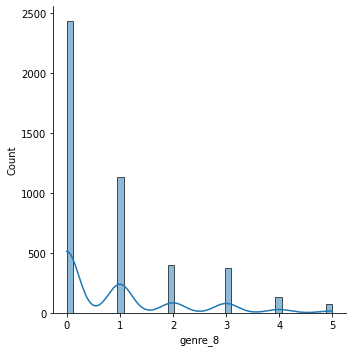

In [234]:
sns.displot(df, x="genre_8", kde=True)

In [235]:
genre9 = df["genre_9"].unique()
num9 = list(range(len(genre9)))
genre9_mapping = dict(zip(genre9, num9))
df["genre_9"] = df["genre_9"].map(genre9_mapping).astype(int)

df["genre_9"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [236]:
df["Genre9Range"] = pd.cut(df['genre_9'], 6)
df[["Genre9Range", "price"]].groupby(["Genre9Range"], as_index=False).mean().sort_values(by="Genre9Range", ascending=True)

,Genre9Range,price
0,"(-0.378, 63.0]",222104.841833
1,"(63.0, 126.0]",231461.754373
2,"(126.0, 189.0]",235308.184581
3,"(189.0, 252.0]",223542.769698
4,"(252.0, 315.0]",219542.146545
5,"(315.0, 378.0]",231230.765769


In [237]:
df = df.drop(["Genre9Range"], axis=1)

In [238]:
df.loc[df["genre_9"] <= 63.0, "genre_9"] = 0
df.loc[(df["genre_9"] > 63.0) & (df["genre_9"] <= 126.0), "genre_9"] = 1
df.loc[(df["genre_9"] > 126.0) & (df["genre_9"] <= 189.0), "genre_9"] = 2
df.loc[(df["genre_9"] > 189.0) & (df["genre_9"] <= 252.0), "genre_9"] = 3
df.loc[(df["genre_9"] > 252.0) & (df["genre_9"] <= 315.0), "genre_9"] = 4
df.loc[df["genre_9"] > 315.0, "genre_9"] = 5

df

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,volume
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.112319,0.065217,0.050725,0.021739,0.021739,0.018116,0.010870,0.010870,132387.29,643.464943
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.186872,0.057810,0.041629,0.039280,0.029884,0.018270,0.018139,0.015399,201684.89,860.320860
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.211502,0.051174,0.044836,0.034742,0.033333,0.020423,0.019484,0.015962,242830.34,1355.429321
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.110175,0.079103,0.051032,0.038393,0.033600,0.028913,0.023963,0.021593,233157.55,1214.281442
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.104323,0.100764,0.047581,0.046263,0.025834,0.018782,0.017464,0.014630,224206.61,1039.439663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,Impostor Syndrome,Kathy Wang,A sharp and prescient novel about women in the...,0,0,368,2021,Custom House,3,5,...,0.123596,0.123596,0.089888,0.044944,0.033708,0.033708,0.033708,0.022472,339125.13,1035.334704
3993,Black Star,Eric Glover,"Stranded on an alien planet, two astronauts mu...",0,0,176,2021,Abrams ComicArts - Megascope,3,5,...,0.150000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,324688.13,746.635604
3839,Funny Farm: My Unexpected Life with 600 Rescue...,Laurie Zaleski,An inspiring and moving memoir of the author's...,0,0,256,2021,St. Martin's Press,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339125.13,6546.058521
3979,"Mothers of Pine Way (Pine Valley, #2)",Corrine Ardoin,Ninety-year-old Ev has been encouraged to atte...,1,0,172,2021,Black Rose Writing,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100914.63,1017.636674


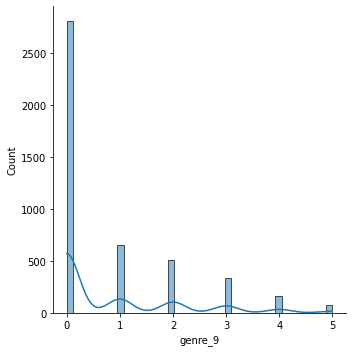

In [239]:
sns.displot(df, x="genre_9", kde=True)

In [240]:
df.isnull().sum()

title               0
author              0
description         0
bookformat          0
bookedition         0
pages               0
published_date      0
publisher           0
reading_age         0
lexile_measure      0
weight              0
rating_value0       0
rating_value1       0
rating_count0       0
rating_count1       0
genre_0             0
genre_1             0
genre_2             0
genre_3             0
genre_4             0
genre_5             0
genre_6             0
genre_7             0
genre_8             0
genre_9             0
genre_0_weight    231
genre_1_weight    297
genre_2_weight    346
genre_3_weight    380
genre_4_weight    429
genre_5_weight    472
genre_6_weight    507
genre_7_weight    554
genre_8_weight    595
genre_9_weight    640
price               0
volume              0
dtype: int64

In [241]:
print("Genre_0_weight Mean : {} , Genre_0_weight Median : {}".format(df["genre_0_weight"].mean(), df["genre_0_weight"].median()))

Genre_0_weight Mean : 0.4272107870191558 , Genre_0_weight Median : 0.3864524533217542


In [242]:
df["genre_0_weight"] = df["genre_0_weight"].fillna(df["genre_0_weight"].median())
df["genre_0_weight"].isnull().sum()

0

In [243]:
print("Genre_1_weight Mean : {} , Genre_1_weight Median : {}".format(df["genre_1_weight"].mean(), df["genre_1_weight"].median()))

Genre_1_weight Mean : 0.19846754177857484 , Genre_1_weight Median : 0.1963203010662764


In [244]:
df["genre_1_weight"] = df["genre_1_weight"].fillna(df["genre_1_weight"].median())
df["genre_1_weight"].isnull().sum()

0

In [245]:
print("Genre_2_weight Mean : {} , Genre_2_weight Median : {}".format(df["genre_2_weight"].mean(), df["genre_2_weight"].median()))

Genre_2_weight Mean : 0.11955757887105332 , Genre_2_weight Median : 0.11746941374448536


In [246]:
df["genre_2_weight"] = df["genre_2_weight"].fillna(df["genre_2_weight"].median())
df["genre_2_weight"].isnull().sum()

0

In [247]:
print("Genre_3_weight Mean : {} , Genre_3_weight Median : {}".format(df["genre_3_weight"].mean(), df["genre_3_weight"].median()))

Genre_3_weight Mean : 0.07869386114711674 , Genre_3_weight Median : 0.0761288087719999


In [248]:
df["genre_3_weight"] = df["genre_3_weight"].fillna(df["genre_3_weight"].median())
df["genre_3_weight"].isnull().sum()

0

In [249]:
print("Genre_4_weight Mean : {} , Genre_4_weight Median : {}".format(df["genre_4_weight"].mean(), df["genre_4_weight"].median()))

Genre_4_weight Mean : 0.0556961092102376 , Genre_4_weight Median : 0.0532687651331719


In [250]:
df["genre_4_weight"] = df["genre_4_weight"].fillna(df["genre_4_weight"].median())
df["genre_4_weight"].isnull().sum()

0

In [251]:
print("Genre_5_weight Mean : {} , Genre_5_weight Median : {}".format(df["genre_5_weight"].mean(), df["genre_5_weight"].median()))

Genre_5_weight Mean : 0.04210271333998135 , Genre_5_weight Median : 0.04069366479550915


In [252]:
df["genre_5_weight"] = df["genre_5_weight"].fillna(df["genre_5_weight"].median())
df["genre_5_weight"].isnull().sum()

0

In [253]:
print("Genre_6_weight Mean : {} , Genre_6_weight Median : {}".format(df["genre_6_weight"].mean(), df["genre_6_weight"].median()))

Genre_6_weight Mean : 0.032815173306308225 , Genre_6_weight Median : 0.031980319803198


In [254]:
df["genre_6_weight"] = df["genre_6_weight"].fillna(df["genre_6_weight"].median())
df["genre_6_weight"].isnull().sum()

0

In [255]:
print("Genre_7_weight Mean : {} , Genre_7_weight Median : {}".format(df["genre_7_weight"].mean(), df["genre_7_weight"].median()))

Genre_7_weight Mean : 0.0265946355753359 , Genre_7_weight Median : 0.025687718974443753


In [256]:
df["genre_7_weight"] = df["genre_7_weight"].fillna(df["genre_7_weight"].median())
df["genre_7_weight"].isnull().sum()

0

In [257]:
print("Genre_8_weight Mean : {} , Genre_8_weight Median : {}".format(df["genre_8_weight"].mean(), df["genre_8_weight"].median()))

Genre_8_weight Mean : 0.022058453822815762 , Genre_8_weight Median : 0.0214183722037125


In [258]:
df["genre_8_weight"] = df["genre_8_weight"].fillna(df["genre_8_weight"].median())
df["genre_8_weight"].isnull().sum()

0

In [259]:
print("Genre_9_weight Mean : {} , Genre_9_weight Median : {}".format(df["genre_9_weight"].mean(), df["genre_9_weight"].median()))

Genre_9_weight Mean : 0.018316385616645746 , Genre_9_weight Median : 0.0177908029147381


In [260]:
df["genre_9_weight"] = df["genre_9_weight"].fillna(df["genre_9_weight"].median())
df["genre_9_weight"].isnull().sum()

0

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


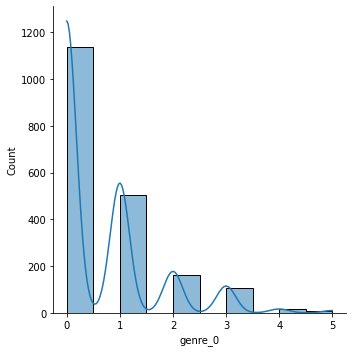

In [261]:
sns.displot(df, x="genre_0", kde=True, weights=df["genre_0_weight"])

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


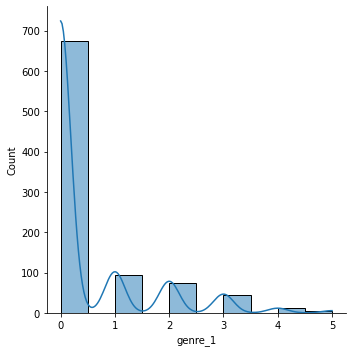

In [262]:
sns.displot(df, x="genre_1", kde=True, weights=df["genre_1_weight"])

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


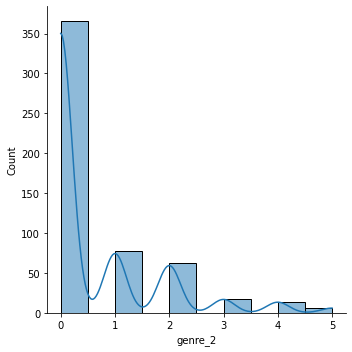

In [263]:
sns.displot(df, x="genre_2", kde=True, weights=df["genre_2_weight"])

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


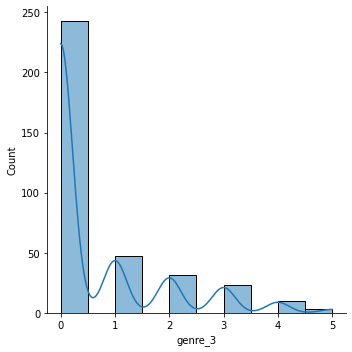

In [264]:
sns.displot(df, x="genre_3", kde=True, weights=df["genre_3_weight"])

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


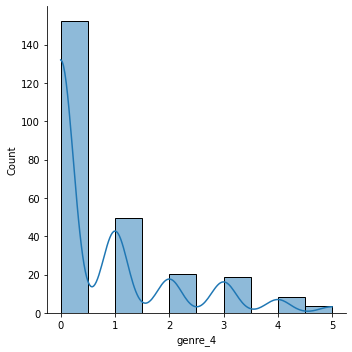

In [265]:
sns.displot(df, x="genre_4", kde=True, weights=df["genre_4_weight"])

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


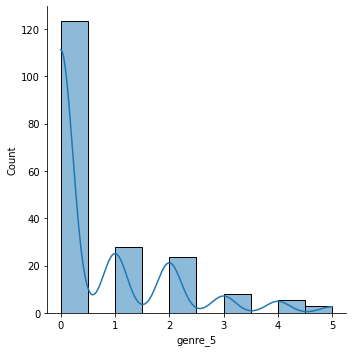

In [266]:
sns.displot(df, x="genre_5", kde=True, weights=df["genre_5_weight"])

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


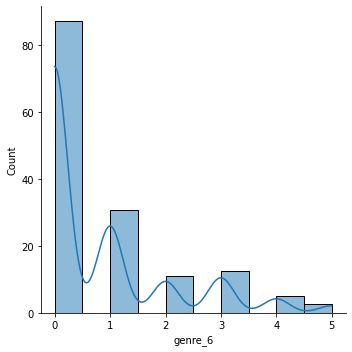

In [267]:
sns.displot(df, x="genre_6", kde=True, weights=df["genre_6_weight"])

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


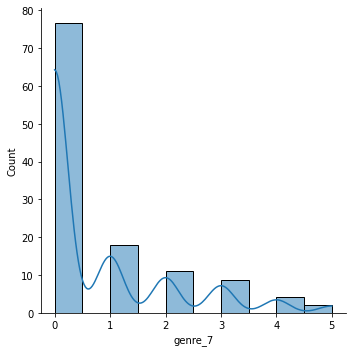

In [268]:
sns.displot(df, x="genre_7", kde=True, weights=df["genre_7_weight"])

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


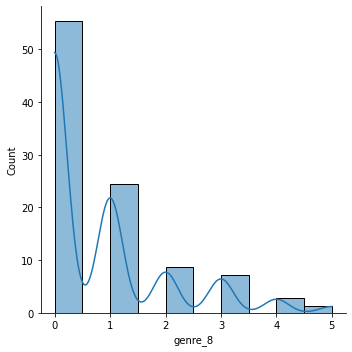

In [269]:
sns.displot(df, x="genre_8", kde=True, weights=df["genre_8_weight"])

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


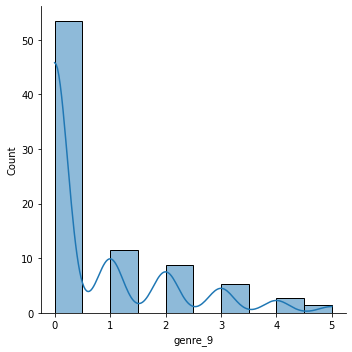

In [270]:
sns.displot(df, x="genre_9", kde=True, weights=df["genre_9_weight"])

In [271]:
df.isnull().sum()

title             0
author            0
description       0
bookformat        0
bookedition       0
pages             0
published_date    0
publisher         0
reading_age       0
lexile_measure    0
weight            0
rating_value0     0
rating_value1     0
rating_count0     0
rating_count1     0
genre_0           0
genre_1           0
genre_2           0
genre_3           0
genre_4           0
genre_5           0
genre_6           0
genre_7           0
genre_8           0
genre_9           0
genre_0_weight    0
genre_1_weight    0
genre_2_weight    0
genre_3_weight    0
genre_4_weight    0
genre_5_weight    0
genre_6_weight    0
genre_7_weight    0
genre_8_weight    0
genre_9_weight    0
price             0
volume            0
dtype: int64

In [272]:
df["genre0weight"] = df["genre_0"]*df["genre_0_weight"]
df["genre1weight"] = df["genre_1"]*df["genre_1_weight"]
df["genre2weight"] = df["genre_2"]*df["genre_2_weight"]
df["genre3weight"] = df["genre_3"]*df["genre_3_weight"]
df["genre4weight"] = df["genre_4"]*df["genre_4_weight"]
df["genre5weight"] = df["genre_5"]*df["genre_5_weight"]
df["genre6weight"] = df["genre_6"]*df["genre_6_weight"]
df["genre7weight"] = df["genre_7"]*df["genre_7_weight"]
df["genre8weight"] = df["genre_8"]*df["genre_8_weight"]
df["genre9weight"] = df["genre_9"]*df["genre_9_weight"]

In [273]:
df = df[["title","author","description","bookformat","bookedition","pages","published_date","publisher","reading_age","lexile_measure","weight","rating_value0"
        ,"rating_count0","rating_value1","rating_count1","genre0weight","genre1weight","genre2weight","genre3weight","genre4weight","genre5weight","genre6weight"
        ,"genre7weight","genre8weight","genre9weight","volume","price"]]
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre2weight,genre3weight,genre4weight,genre5weight,genre6weight,genre7weight,genre8weight,genre9weight,volume,price
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.464943,132387.29
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,860.320860,201684.89
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1355.429321,242830.34
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1214.281442,233157.55
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1039.439663,224206.61


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

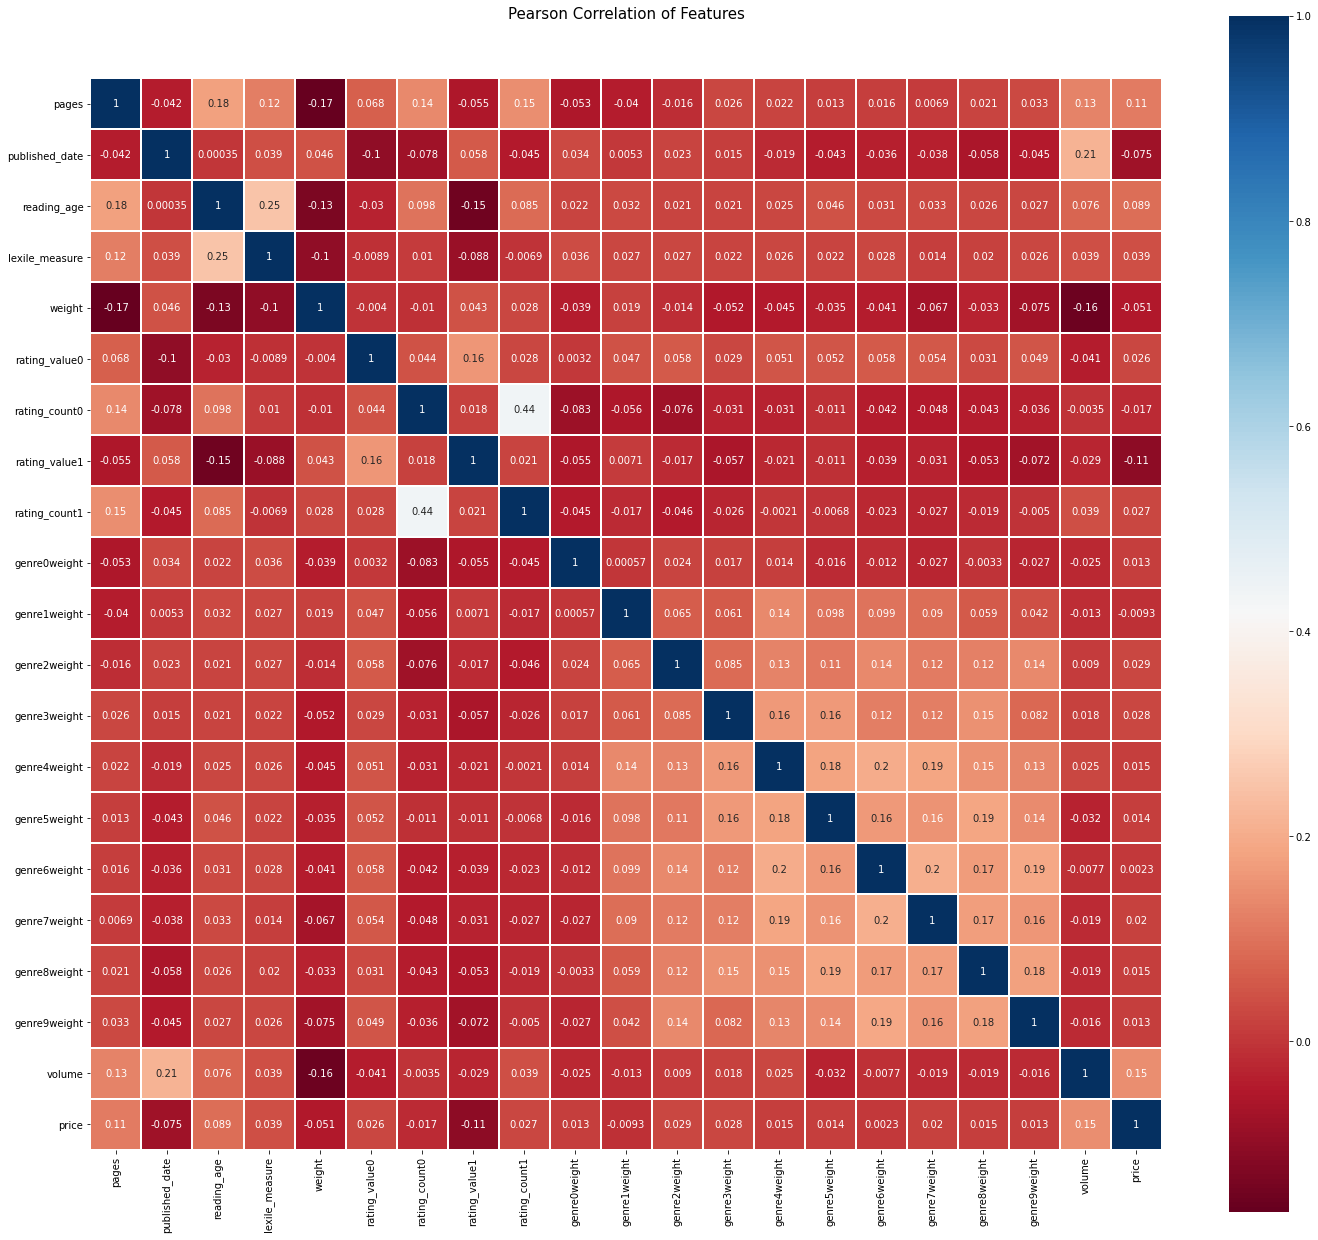

In [274]:
colormap = plt.cm.RdBu
plt.figure(figsize=(24,22))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [275]:
df.head()

,title,author,description,bookformat,bookedition,pages,published_date,publisher,reading_age,lexile_measure,...,genre2weight,genre3weight,genre4weight,genre5weight,genre6weight,genre7weight,genre8weight,genre9weight,volume,price
2340,When I Grow Up,Al Yankovic,'Cause maybe I'll be a gorilla masseuse Or an ...,0,0,32,2011,HarperCollins,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.464943,132387.29
4297,The Statistical Probability of Love at First S...,Jennifer E. Smith,Who would have guessed that four minutes could...,0,0,236,2012,Poppy,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,860.320860,201684.89
351,This Is What Happy Looks Like,Jennifer E. Smith,"If fate sent you an email, would you answer?Wh...",0,0,404,2013,Poppy,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1355.429321,242830.34
4130,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,An alternate cover for this ISBN can be found ...,0,0,315,2012,Knopf,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1214.281442,233157.55
4296,Code Name Verity,Elizabeth Wein,"Oct. 11th, 1943-A British spy plane crashes in...",0,2,343,2012,"Little, Brown Books for Young Readers",4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1039.439663,224206.61


In [276]:
df["bookedition"] = df["bookedition"].astype(int)
df["bookformat"] = df["bookformat"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550 entries, 2340 to 3669
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4550 non-null   object 
 1   author          4550 non-null   object 
 2   description     4550 non-null   object 
 3   bookformat      4550 non-null   int32  
 4   bookedition     4550 non-null   int32  
 5   pages           4550 non-null   int32  
 6   published_date  4550 non-null   int32  
 7   publisher       4550 non-null   object 
 8   reading_age     4550 non-null   int32  
 9   lexile_measure  4550 non-null   int32  
 10  weight          4550 non-null   float64
 11  rating_value0   4550 non-null   float64
 12  rating_count0   4550 non-null   float64
 13  rating_value1   4550 non-null   float64
 14  rating_count1   4550 non-null   float64
 15  genre0weight    4550 non-null   float64
 16  genre1weight    4550 non-null   float64
 17  genre2weight    4550 non-null 

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [277]:
shuffle_df = df.sample(frac=1)
train_size = len(df)*0.8
train_df = shuffle_df[:int(train_size)]
test_df = shuffle_df[int(train_size):]

In [278]:
X_train = train_df.drop(["title","author","description","publisher","price"], axis=1)
Y_train = train_df["price"]
X_test = test_df.drop(["title","author","description","publisher","price"], axis=1)
Y_test = test_df["price"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3640, 22), (3640,), (910, 22), (910,))

In [292]:
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
#!pip install catboost
#from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [293]:
# Random Forrest
rfr_model = RandomForestRegressor(n_estimators=200, random_state=42)

rfr_model.fit(X_train, Y_train)

preds = rfr_model.predict(X_test)

acc_rfr = round(rfr_model.score(X_train, Y_train) * 100, 2)

print("Accuracy for Random Forest Regressor: {}".format(acc_rfr))
print("r2_score : ", r2_score(Y_test, preds))

Accuracy for Random Forest Regressor: 88.56
r2_score :  0.26349073655836774


In [294]:
# XGBoost
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)

xgboost_model.fit(X_train, Y_train)

preds = xgboost_model.predict(X_test)

acc_XGB = round(xgboost_model.score(X_train, Y_train) * 100, 2)

print("Accuracy for XG Boost: {}".format(acc_XGB))
print("r2_score : ", r2_score(Y_test, preds))

Accuracy for XG Boost: 83.02
r2_score :  0.25656282140495035


In [295]:
# Decision Tree
dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, Y_train)

preds = dt_model.predict(X_test)

acc_dt = round(dt_model.score(X_train, Y_train) * 100, 2)

print("Accuracy for Decision Tree: {}".format(acc_dt))
print("r2_score : ", r2_score(Y_test, preds))

Accuracy for Decision Tree: 99.8
r2_score :  -0.29151123260101675


In [296]:
# Gradient Boost
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train, Y_train)

preds = gb_model.predict(X_test)

acc_gb = round(gb_model.score(X_train, Y_train) * 100, 2)

print("Accuracy for Gradient Boosting: {}".format(acc_gb))
print("r2_score : ", r2_score(Y_test, preds))

Accuracy for Gradient Boosting: 56.02
r2_score :  0.1833453400477284


In [ ]:
# Cat Boost
cb_model = CatBoostRegressor()

cb_model.fit(X_train, Y_train)

preds = cb_model.predict(X_test)

acc_cb = round(cb_model.score(X_train, Y_train) * 100, 2)

print("Accuracy for Cat Boosting: {}".format(acc_gb))
print("r2_score : ", r2_score(Y_test, preds))